# US Flights in 2008 and comparisons with other years
## by Duc Vu

<a id="TOC"></a>

### Table of Contents
<ul>
<li><a href="#wrangling">Preliminary Wrangling</a></li>
<li><a href="#uni">Univariate Exploration</a></li>
    <ul>
        <li><a href="#unicon">Insights and Conclusions</a></li>
    </ul>
<li><a href="#bi">Bivariate Exploration</a></li>
    <ul>
        <li><a href="#bicon">Insights and Conclusions</a></li>
    </ul>
<li><a href="#multi">Multivariate Exploration</a></li>
    <ul>
        <li><a href="#multicon">Insights and Conclusions</a></li>
    </ul>

<a id="wrangling"></a>
## Preliminary Wrangling

The datasets are obtained through the [Statistical Computing
Statistical Graphics](http://stat-computing.org/dataexpo/2009/the-data.html) and contain US flights information for 1987-2008. 

Chosen for this project are flights information for five year intervals (1988, 1993, 1998, 2003, 2008). The main data analysis and visualisations will be conducted for Year 2008. The project contains three sections - Univariate, Bivariate, and Multivariate Exploration.

Several visualisations and insights will combine 2008 with the years mentioned above. The files `Flights2008.csv` and other years contain the most important information about the flights, including scheduled and actual departure times, arrival times, cancellations, delays, etc..

In addition to the flight information files, the carrier airline, origin and destination locations information are located in seperate files - `carriers.csv` and `airport.csv` respectively. 

### The Dataset

1. **The main flight dataset.** It contains many variables of US flights for 1987-2008. Chosen for this project are flights information for five year intervals (1988, 1993, 1998, 2003, 2008). The main data analysis and visualisations will be conducted for the year 2008. The dataset can be obtained through the [Statistical Computing
Statistical Graphics](http://stat-computing.org/dataexpo/2009/the-data.html).
2. **The carrier airline.** This provides the code and name of the airlines.
3. **The locations of origin and destination of flights.**  These contain the International Air Transport Association (IATA),  information about the airport, the city and state it is located in, and the latitude and longitude.

In [3]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import datetime as dt

%matplotlib inline

**Firstly**, the datasets containing the vital flight information `FlightsYYYY.csv` for different years are read into dataframes. 

In [4]:
# Loading Original Flight Information Dataset
f2008 = pd.read_csv("./Dataset/Flights2008.csv", encoding="utf-8")

For years 1988, 1993, 1998, and 2003, the following columns will be loaded into a DF for comparison analysis: Year, Month, DayofMonth, ArrDelay, DepDelay, and Cancelled.

In [3]:
col_pre_2008 = ["Year", "Month", "DayofMonth", "ArrDelay", "DepDelay", "Cancelled"]

In [4]:
f1988 = pd.read_csv("./Dataset/Flights1988.csv", encoding="utf-8", usecols = col_pre_2008)
f1993 = pd.read_csv("./Dataset/Flights1993.csv", encoding="utf-8", usecols = col_pre_2008)
f1998 = pd.read_csv("./Dataset/Flights1998.csv", encoding="utf-8", usecols = col_pre_2008)
f2003 = pd.read_csv("./Dataset/Flights2003.csv", encoding="utf-8", usecols = col_pre_2008)

In [5]:
#f1988.shape, f1993.shape, f1998.shape, f2003.shape, 
f2008.shape

(7009728, 29)

In [6]:
# Column labels
f2008.columns

Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime',
       'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum', 'TailNum',
       'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut',
       'Cancelled', 'CancellationCode', 'Diverted', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'],
      dtype='object')

In [7]:
f1988.columns

Index(['Year', 'Month', 'DayofMonth', 'ArrDelay', 'DepDelay', 'Cancelled'], dtype='object')

As each dataframe contain large amounts of data, it is better to keep the dataframes seperate for faster running time rather than combining into one large dataframe. 

In [8]:
pd.set_option("display.max_column", 29)
f2008.sample(5)

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
6121315,2008,11,13,4,1903.0,1909,2150.0,2151,OO,6418,N943SW,107.0,102.0,86.0,-1.0,-6.0,SFO,SLC,599,3.0,18.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
4593431,2008,8,4,1,1514.0,1513,1652.0,1702,FL,238,N955AT,98.0,109.0,78.0,-10.0,1.0,PBI,ATL,545,11.0,9.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
1547015,2008,3,19,3,605.0,600,844.0,839,FL,571,N892AT,99.0,99.0,84.0,5.0,5.0,BMI,ATL,533,7.0,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
5619671,2008,10,2,4,2200.0,2210,2338.0,2350,US,1134,N756US,98.0,100.0,76.0,-12.0,-10.0,CLT,DTW,500,11.0,11.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
5631768,2008,10,12,7,1553.0,1601,1723.0,1732,US,162,N813AW,90.0,91.0,64.0,-9.0,-8.0,LAS,SJC,386,4.0,22.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN


**Secondly**, two seperate files containing carrier information (`carriers.csv`) and airport locations in the US (`airports.csv`) are added.

In [5]:
carriers = pd.read_csv("./Dataset/carriers.csv")
carriers.head()

,Code,Description
0,02Q,Titan Airways
1,04Q,Tradewind Aviation
2,05Q,"Comlux Aviation, AG"
3,06Q,Master Top Linhas Aereas Ltd.
4,07Q,Flair Airlines Ltd.


In [10]:
carriers.shape[0]

1491

In [6]:
airports = pd.read_csv("./Dataset/airports.csv")
airports.head()

,iata,airport,city,state,country,lat,long
0,00M,Thigpen,Bay Springs,MS,USA,31.953765,-89.234505
1,00R,Livingston Municipal,Livingston,TX,USA,30.685861,-95.017928
2,00V,Meadow Lake,Colorado Springs,CO,USA,38.945749,-104.569893
3,01G,Perry-Warsaw,Perry,NY,USA,42.741347,-78.052081
4,01J,Hilliard Airpark,Hilliard,FL,USA,30.688012,-81.905944


**Thirdly**, the carrier names from the `carriers` DF are combined with the all the flights DF. Before combining, create a copy of each DF. 

In [7]:
# Create a copy of each dataframe
f2008_clean = f2008.copy()

In [13]:
f1988_clean = f1988.copy()
f1993_clean = f1993.copy()
f1998_clean = f1998.copy()
f2003_clean = f2003.copy()

In [8]:
# Combining carriers to DF
f2008_clean = pd.merge(f2008_clean, carriers, left_on = "UniqueCarrier", right_on = "Code", how = "left")

In [15]:
f2008_clean.columns

Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime',
       'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum', 'TailNum',
       'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut',
       'Cancelled', 'CancellationCode', 'Diverted', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay',
       'Code', 'Description'],
      dtype='object')

**Fourthly**, the airport city and states from the `airport` DF are merged with the flights DF for origin and destinations. Before merging, only the iata code, city and state are needed to be added. 

In [9]:
airports_mod = airports[["iata", "city", "state"]]
airports_mod.head()

,iata,city,state
0,00M,Bay Springs,MS
1,00R,Livingston,TX
2,00V,Colorado Springs,CO
3,01G,Perry,NY
4,01J,Hilliard,FL


In [10]:
# Combining origin locations for 2008
f2008_clean = pd.merge(f2008_clean, airports_mod, left_on = "Origin", right_on = "iata", how = "left")

In [11]:
# Combining destination locations for 2008
f2008_clean = pd.merge(f2008_clean, airports_mod, left_on = "Dest", right_on = "iata", how = "left")

In [19]:
f2008_clean.columns

Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime',
       'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum', 'TailNum',
       'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut',
       'Cancelled', 'CancellationCode', 'Diverted', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay',
       'Code', 'Description', 'iata_x', 'city_x', 'state_x', 'iata_y',
       'city_y', 'state_y'],
      dtype='object')

### Structure of the dataset

Each DataFrame contain all US flights for different years, with over five million flights each with 26 variables. Some variables require a change in datatypes. Others require a change in actual values.

In [20]:
f2008_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7009728 entries, 0 to 7009727
Data columns (total 37 columns):
Year                 int64
Month                int64
DayofMonth           int64
DayOfWeek            int64
DepTime              float64
CRSDepTime           int64
ArrTime              float64
CRSArrTime           int64
UniqueCarrier        object
FlightNum            int64
TailNum              object
ActualElapsedTime    float64
CRSElapsedTime       float64
AirTime              float64
ArrDelay             float64
DepDelay             float64
Origin               object
Dest                 object
Distance             int64
TaxiIn               float64
TaxiOut              float64
Cancelled            int64
CancellationCode     object
Diverted             int64
CarrierDelay         float64
WeatherDelay         float64
NASDelay             float64
SecurityDelay        float64
LateAircraftDelay    float64
Code                 object
Description          object
iata_x         

The following variables (or columns) require a change in data types:
- `Cancelled` to a Boolean
- `Diverted` to a Boolean
- `DepTime`, `CRSDepTime`, `ArrTime`, `CRSArrTime` to an integer for regular expressions manipulation later 

In [12]:
f2008_clean.Cancelled.replace({1: True, 0: False}, inplace=True)
f2008_clean.Diverted.replace({1: True, 0: False}, inplace=True)

In [22]:
f1988_clean.Cancelled.replace({1: True, 0: False}, inplace=True)
f1993_clean.Cancelled.replace({1: True, 0: False}, inplace=True)
f1998_clean.Cancelled.replace({1: True, 0: False}, inplace=True)
f2003_clean.Cancelled.replace({1: True, 0: False}, inplace=True)

In [23]:
f2008_clean.Cancelled.value_counts()

False    6872294
True      137434
Name: Cancelled, dtype: int64

In [13]:
# Change datatypes to integer
time_ls = ["DepTime", "CRSDepTime", "ArrTime", "CRSArrTime"]

for time in time_ls:
    f2008_clean[time] = pd.Series(f2008_clean[time], dtype="Int64")

In addition, the values in the `CancellationCode` will be replaced with the actual reason instead of a code. Prior to 2003, the reasons were not recorded. Therefore, only the flights in 2008 will be affected by this analysis.

In [14]:
f2008_clean.CancellationCode = f2008_clean.CancellationCode.astype(object)
f2008_clean.CancellationCode.value_counts()

B    54904
A    54330
C    28188
D       12
Name: CancellationCode, dtype: int64

In [15]:
cancellation_dict = {"A": "carrier", "B": "weather", "C": "NAS", "D": "security"}
f2008_clean.CancellationCode = f2008_clean.CancellationCode.replace(cancellation_dict)
f2008_clean.CancellationCode.value_counts()

weather     54904
carrier     54330
NAS         28188
security       12
Name: CancellationCode, dtype: int64

Furthermore, US Airways Inc. and America West Airlines Inc. merged to form US Airways Inc. from September 2005. Thus, prior to 2005, the names of the two airlines will be as they are, and after 2005, only US Airways Inc. exist. 

In [27]:
f2008_clean.Description.value_counts().head()

Southwest Airlines Co.                                                                 1201754
American Airlines Inc.                                                                  604885
Skywest Airlines Inc.                                                                   567159
American Eagle Airlines Inc.                                                            490693
US Airways Inc. (Merged with America West 9/05. Reporting for both starting 10/07.)     453589
Name: Description, dtype: int64

In [16]:
# Prior to 2005, the two airlines will be under their own names (removing the "(Merged...)")
airline_dict = {"US Airways Inc. (Merged with America West 9/05. Reporting for both starting 10/07.)": "US Airways Inc.",
               "America West Airlines Inc. (Merged with US Airways 9/05. Stopped reporting 10/07.)": "America West Airlines Inc."}

In [17]:
# After 2005, both airlines merged and only formed "US Airways Inc."
f2008_clean.Description = f2008_clean.Description.replace(airline_dict)
f2008_clean.Description.value_counts()

Southwest Airlines Co.          1201754
American Airlines Inc.           604885
Skywest Airlines Inc.            567159
American Eagle Airlines Inc.     490693
US Airways Inc.                  453589
Delta Air Lines Inc.             451931
United Air Lines Inc.            449515
Expressjet Airlines Inc.         374510
Northwest Airlines Inc.          347652
Continental Air Lines Inc.       298455
Atlantic Southeast Airlines      280575
Pinnacle Airlines Inc.           262208
AirTran Airways Corporation      261684
Mesa Airlines Inc.               254930
Comair Inc.                      197607
JetBlue Airways                  196091
Alaska Airlines Inc.             151102
Frontier Airlines Inc.            95762
Hawaiian Airlines Inc.            61826
Aloha Airlines Inc.                7800
Name: Description, dtype: int64

The `DepTime`, `CRSDepTime`, `ArrTime` and `CRSArrTime` requires padding as the timings are either three or four digits long. For consistency, the timings before 1000 will be padded with a zero in front. For example 737 will become 0737.

In [18]:
# First, padding of 0 is required for timings with 3 digit widths, i.e. timings before 1000. 
# Method below requires the timings to be changed to object type
f2008_clean.CRSDepTime = f2008_clean.CRSDepTime.astype(str).str.zfill(4)
f2008_clean.CRSDepTime[0:5]

0    1955
1    0735
2    0620
3    0930
4    1755
Name: CRSDepTime, dtype: object

In [31]:
f2008_clean.describe()

,Year,Month,DayofMonth,DayOfWeek,DepTime,ArrTime,CRSArrTime,FlightNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Distance,TaxiIn,TaxiOut,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
count,7009728.0,7.009728e+06,7.009728e+06,7.009728e+06,6.873482e+06,6.858079e+06,7.009728e+06,7.009728e+06,6.855029e+06,7.008884e+06,6.855029e+06,6.855029e+06,6.873482e+06,7.009728e+06,6.858079e+06,6.872670e+06,1.524735e+06,1.524735e+06,1.524735e+06,1.524735e+06,1.524735e+06
mean,2008.0,6.375130e+00,1.572801e+01,3.924182e+00,1.333830e+03,1.481258e+03,1.494801e+03,2.224200e+03,1.273224e+02,1.288668e+02,1.040186e+02,8.168452e+00,9.972570e+00,7.263870e+02,6.860852e+00,1.645305e+01,1.577206e+01,3.039031e+00,1.716462e+01,7.497434e-02,2.077098e+01
std,0.0,3.406737e+00,8.797068e+00,1.988259e+00,4.780689e+02,5.052251e+02,4.826728e+02,1.961716e+03,7.018731e+01,6.940974e+01,6.743980e+01,3.850194e+01,3.531127e+01,5.621018e+02,4.933649e+00,1.133280e+01,4.009912e+01,1.950287e+01,3.189495e+01,1.837940e+00,3.925964e+01
min,2008.0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.200000e+01,-1.410000e+02,0.000000e+00,-5.190000e+02,-5.340000e+02,1.100000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2008.0,3.000000e+00,8.000000e+00,2.000000e+00,9.280000e+02,1.107000e+03,1.115000e+03,6.220000e+02,7.700000e+01,8.000000e+01,5.500000e+01,-1.000000e+01,-4.000000e+00,3.250000e+02,4.000000e+00,1.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2008.0,6.000000e+00,1.600000e+01,4.000000e+00,1.325000e+03,1.512000e+03,1.517000e+03,1.571000e+03,1.100000e+02,1.100000e+02,8.600000e+01,-2.000000e+00,-1.000000e+00,5.810000e+02,6.000000e+00,1.400000e+01,0.000000e+00,0.000000e+00,6.000000e+00,0.000000e+00,0.000000e+00
75%,2008.0,9.000000e+00,2.300000e+01,6.000000e+00,1.728000e+03,1.909000e+03,1.907000e+03,3.518000e+03,1.570000e+02,1.590000e+02,1.320000e+02,1.200000e+01,8.000000e+00,9.540000e+02,8.000000e+00,1.900000e+01,1.600000e+01,0.000000e+00,2.100000e+01,0.000000e+00,2.600000e+01
max,2008.0,1.200000e+01,3.100000e+01,7.000000e+00,2.400000e+03,2.400000e+03,2.400000e+03,9.743000e+03,1.379000e+03,1.435000e+03,1.350000e+03,2.461000e+03,2.467000e+03,4.962000e+03,3.080000e+02,4.290000e+02,2.436000e+03,1.352000e+03,1.357000e+03,3.920000e+02,1.316000e+03


### Main features of interest in the dataset



### The following features in the dataset will help support the questions of interest as outlined above.  

The main features (or columns) of interest are:
- `Year`
- `Month`
- `Day` - renamed from `DayofMonth`
- `DayOfWeek`
- `DepTime` - actual depature time (local, in hhmm)
- `CRSDepTime` - scheduled departure time (local, in hhmm)
- `ArrTime` - actual arrival time (in hhmm)
- `CRSArrTime` - scheduled arrival time (local, in hhmm)
- `ActualElapsedTime` - actual flight elapsed time (in minutes)
- `CRSElapsedTime` - scheduled flight elapsed time (in minutes)
- `AirTime` - time of aircraft in air (in minutes)
- `ArrDelay` - arrival delay (in minutes)
- `DepDelay` - departure delay (in minutes)
- `Distance` - in miles
- `Cancelled` - was the flight cancelled? 
- `CancellationReason` - reason for cancellation. This column is renamed from `CancellationCode` and the appropriate reason is shown. 
- `Diverted` - was the flight diverted? 
- `CarrierDelay`, `WeatherDelay`, `NASDelay`, `SecurityDelay`, `LateAircraftDelay` - in minutes
-  `Airline` - name of airline carrier, renamed from `Description` column
- `Origin_city` and `Origin_state` - location of origin of flight, renamed from `city_x` and `state_x` 
- `Dest_city` and `Dest_state` - location of origin of flight, renamed from `city_y` and `state_y`

### The main features of the dataset  

- `Year`
- `Month`
- `Day`
- `DayOfWeek`
- `DepTime` - actual depature time (local, in hhmm)
- `CRSDepTime` - scheduled departure time (local, in hhmm)
- `ArrTime` - actual arrival time (in hhmm)
- `CRSArrTime` - scheduled arrival time (local, in hhmm)
- `ActualElapsedTime` - actual flight elapsed time (in minutes)
- `CRSElapsedTime` - scheduled flight elapsed time (in minutes)
- `AirTime` - time of aircraft in air (in minutes)
- `ArrDelay` - arrival delay (in minutes)
- `DepDelay` - departure delay (in minutes)
- `Distance` - in miles

- `Cancelled` - was the flight cancelled? 
- `CancellationReason` - reason for cancellation (carrier, weather, NAS, or security)
- `Diverted` - was the flight diverted? 
- `CarrierDelay`, `WeatherDelay`, `NASDelay`, `SecurityDelay`, `LateAircraftDelay` - in minutes
-  `Airline` - name of airline carrier,
- `Origin_city` and `Origin_state` - location of origin of flight
- `Dest_city` and `Dest_state` - location of origin of flight

In [19]:
# Rename columns
f2008_clean.rename(columns={"DayofMonth": "Day", "city_x": "Origin_city", "state_x": "Origin_state", 
                            "city_y": "Dest_city", "state_y": "Dest_state", "Description": "Airline", 
                            "CancellationCode": "CancellationReason"}, inplace = True)

In [20]:
# Dropped unnecessary columns
columns_drop = ['UniqueCarrier', 'FlightNum', 'TailNum', 'Origin', 'Dest', 
                'TaxiIn', 'TaxiOut', 'Code', 'iata_x', 'iata_y']
f2008_clean.drop(columns_drop, axis = 1, inplace = True)

In [34]:
f2008_clean.columns

Index(['Year', 'Month', 'Day', 'DayOfWeek', 'DepTime', 'CRSDepTime', 'ArrTime',
       'CRSArrTime', 'ActualElapsedTime', 'CRSElapsedTime', 'AirTime',
       'ArrDelay', 'DepDelay', 'Distance', 'Cancelled', 'CancellationReason',
       'Diverted', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay',
       'LateAircraftDelay', 'Airline', 'Origin_city', 'Origin_state',
       'Dest_city', 'Dest_state'],
      dtype='object')

In [35]:
f2008_clean.shape

(7009728, 27)

In [36]:
f2008_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7009728 entries, 0 to 7009727
Data columns (total 27 columns):
Year                  int64
Month                 int64
Day                   int64
DayOfWeek             int64
DepTime               Int64
CRSDepTime            object
ArrTime               Int64
CRSArrTime            Int64
ActualElapsedTime     float64
CRSElapsedTime        float64
AirTime               float64
ArrDelay              float64
DepDelay              float64
Distance              int64
Cancelled             bool
CancellationReason    object
Diverted              bool
CarrierDelay          float64
WeatherDelay          float64
NASDelay              float64
SecurityDelay         float64
LateAircraftDelay     float64
Airline               object
Origin_city           object
Origin_state          object
Dest_city             object
Dest_state            object
dtypes: Int64(3), bool(2), float64(10), int64(5), object(7)
memory usage: 1.4+ GB


<a id="uni"></a>
<a id="univiz"></a>
## Univariate Exploration

In this section of univariate exploration, the year **2008** will be explored. First, the visualisations to each question along with comments on it will be given. Then at the end of the section, interesting insights, interpretations and questions will be provided. 

The distribution of flights from the following variables are explored individually:

1. `DayofMonth` and `Month` - how does the number of flights vary day by day?
2. `Month` - are flights more common in a particular month compared to another?
3. `DayOfWeek` - are there more or fewer flights scheduled in a particular day of the week?
4. `DepDelay` (calculated from `DepTime` and `CRSDepTime`) - what is the distribution of the difference between actual and scheduled depature time?
5. `ArrDelay` (calculated from `ArrTime` and `CRSArrTime`) - what is the distribution of the difference between actual and scheduled arrival time?
6. `CRSDepTime` - are there more flights scheduled at a particular hour of the day?
7. `AirTime` - what is the distribution of the duration of flights?
8. `Distance` - what is the distribution of distances travelled by aircrafts?
9. `Cancelled`  and  `CancellationReason` - what is the proportion of flights cancelled? What are the reasons for cancellations?
10. `Diverted` - what is the proportion of flights diverted?
11. `Airline` - which airline has the most and least flights scheduled?
12. `Origin_city` - what are the top 10 cities with the most flights scheduled to take off?
13. `Origin_state` - what are the top 3 states with the most flights scheduled to take off? What are the top 3 states with the least flights scheduled to take off?

Jump to <a href="#unicon">Univariate Insights and Interpretations</a>

#### `DayofMonth` and `Month` 

**How does the number of flights vary day by day?**

First, create new column in DF in the form of a datetime object. Then, use groupby method to find the total numbers of flights by day and plot a time series.

In [37]:
import matplotlib.dates as mdates

In [21]:
f2008_clean["DateTime"] = pd.to_datetime(f2008_clean[["Year", "Month", "Day"]])

In [39]:
flight_by_day = f2008_clean.groupby("DateTime").count()

/Users/ducvu/anaconda3/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


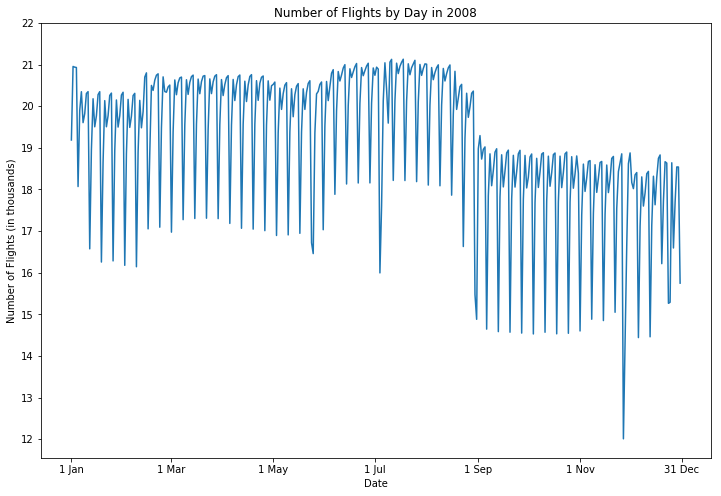

In [40]:
plt.figure(figsize = (12, 8))
plt.errorbar(flight_by_day.index, flight_by_day.Year)

plt.title("Number of Flights by Day in 2008")
plt.xlabel("Date")
plt.ylabel("Number of Flights (in thousands)")
ticks = np.array([n for n in range (12, 23)])
plt.yticks(ticks * 1000, ticks)

# Change the x-axis label
ax = plt.gca().get_xticks()
plt.xticks(ax, ["1 Jan", "1 Mar", "1 May", "1 Jul", "1 Sep", "1 Nov", "31 Dec"]);

In [41]:
flight_by_day[flight_by_day.Year == flight_by_day.Year.min()]

,Year,Month,Day,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Distance,Cancelled,CancellationReason,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Airline,Origin_city,Origin_state,Dest_city,Dest_state
DateTime,,,,,,,,,,,,,,,,,,,,,,,,,,,
2008-11-27,12008,12008,12008,12008,11981,12008,11978,12008,11961,12008,11961,11961,11981,12008,12008,28,12008,950,950,950,950,950,12008,12000,12000,12000,12000


Interestingly, the number of flights follows a spike drop pattern with certain days experiencing a huge drop, and appearing in regular intervals. This drop could be further investigated on what day of the week experiences a lower number of flights. There is a particular sharp drop on 27 November 2008.

To check if there is any pattern and to remove noise, a moving average of 7 days (a week) is computed and plotted. Pandas' rolling function allows to calculate the moving average. 

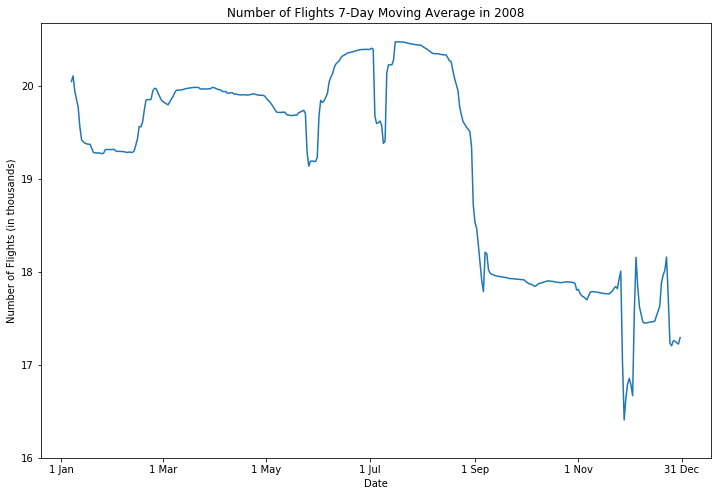

In [42]:
moving_average_7 = flight_by_day.Year.rolling(window = 7).mean()

plt.figure(figsize = (12, 8))
plt.errorbar(flight_by_day.index, moving_average_7)
plt.title("Number of Flights 7-Day Moving Average in 2008")
plt.xlabel("Date")
plt.ylabel("Number of Flights (in thousands)")
ticks0 = np.array([n for n in range (16, 21)])
plt.yticks(ticks0 * 1000, ticks0);

ax = plt.gca().get_xticks()
plt.xticks(ax, ["1 Jan", "1 Mar", "1 May", "1 Jul", "1 Sep", "1 Nov", "31 Dec"]);

The plot does not reveal any particular pattern. However, it can be seen that in February there is a slight dip before rising and staying fairly constant between March and May. The peaks in the number of flights are in July and August, and towards the end of August and beginning of September, there is a noticable significant fall in the number of flights.

#### `Month`

**Are flights more common in a particular month compared to another?**

Is summer and during festive periods in December popular times for people to go on holidays, therefore likely to increase the number of flights scheduled?

In [43]:
month2008 = f2008_clean.Month.value_counts()
month2008

7     627931
3     616090
8     612279
6     608665
5     606293
1     605765
4     598126
2     569236
10    556205
12    544958
9     540908
11    523272
Name: Month, dtype: int64

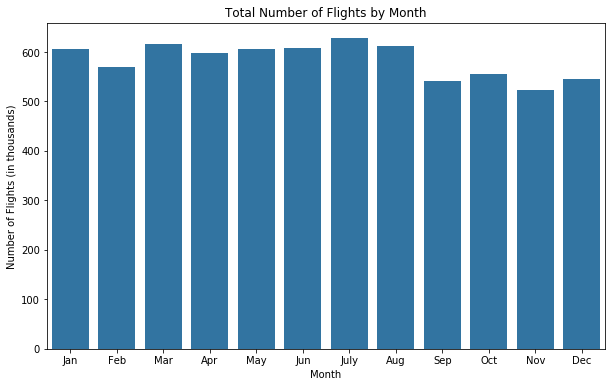

In [44]:
plt.figure(figsize = (10, 6))

# Set standard seaborn color of bar charts to single colour
base_color = sb.color_palette()[0]

# Plot qualitative variable by Month
sb.countplot(data = f2008_clean, x = "Month", color = base_color)
plt.title("Total Number of Flights by Month")
plt.ylabel("Number of Flights (in thousands)")

# Change tick labels for readability 
ticks1 = np.array([n for n in range(0, 601, 100)])
plt.yticks(ticks1 * 1000, ticks1)
months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "July", "Aug", "Sep", "Oct", "Nov", "Dec"]
ax = plt.gca().get_xticks()
plt.xticks(ax, months);

In [45]:
months_dict = {1: "Jan", 2: "Feb", 3: "Mar", 4: "Apr", 5: "May", 6: "Jun", 
               7: "July", 8: "Aug", 9: "Sep", 10: "Oct", 11: "Nov", 12: "Dec"}
months_idx = month2008.index.map(months_dict)

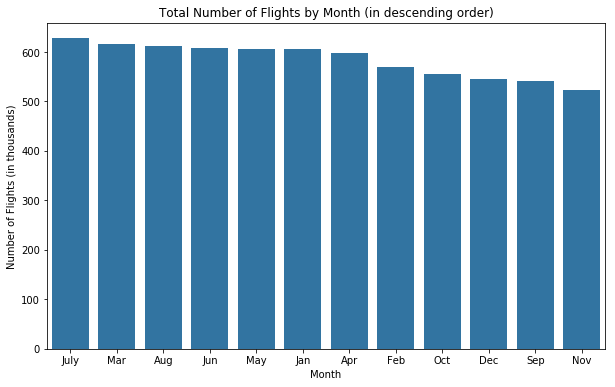

In [46]:
# Plot qualitative variable in descending order of flights
plt.figure(figsize = (10, 6))
sb.countplot(data = f2008_clean, x = "Month", color = base_color, order = month2008.index)

plt.title("Total Number of Flights by Month (in descending order)")
plt.ylabel("Number of Flights (in thousands)")

# Change tick labels for readability 
plt.yticks(ticks1 * 1000, ticks1);
ax = plt.gca().get_xticks()
plt.xticks(ax, months_idx);

In [47]:
(f2008_clean.Month.value_counts().values[0] - f2008_clean.Month.value_counts().values[-1])/f2008_clean.Month.value_counts().values[0] 

0.1666727713713768

In 2008, the months with the most flights scheduled are July, March, and August. The month with the least flight scheduled is November. The difference between the lowest and highest number of flights scheduled by month is almost 100,000 flights or around 17% lower. Interestingly, December has the third least number flights scheduled. 

#### `DayOfWeek`

**Are there more or fewer flights scheduled in a particular day of the week?**

Do we expect more people to take flights during the weekend for a weekend getaway compared to during weekdays? This directly helps answer the previous visualisation on number of flights by day, analysing why there is a regular steep drop on particular days. 

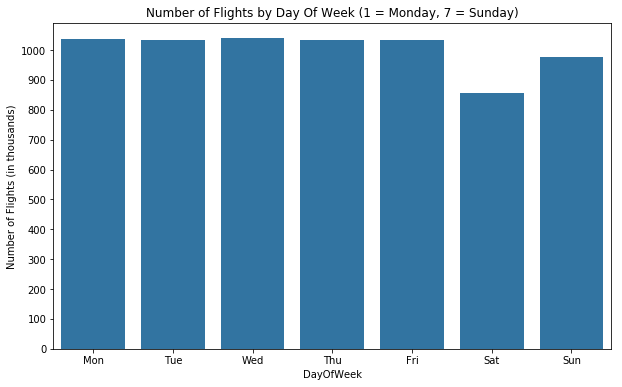

In [48]:
fig = plt.figure(figsize = (10, 6))
sb.countplot(f2008_clean.DayOfWeek, color = base_color)

plt.title("Number of Flights by Day Of Week (1 = Monday, 7 = Sunday)")
plt.ylabel("Number of Flights (in thousands)")
ticks2 = np.array([n for n in range(0, 1001, 100)])
plt.yticks(ticks2 * 1000, ticks2)

# Get axis location to change to name of days of the week
ax = plt.gca().get_xticks()
plt.xticks(ax, ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"]);

This gives an unexpected and interesting distribution. During the weekdays (Mondays to Fridays), the number of flights scheduled are very similar. On the weekends (Saturdays and Sundays), the number of flights are visibly lower, with Saturdays experiencing a significant dip (up to 17% lower). Perhaps, the lower number of flights on Saturday is contributing to the steep drop seen from the first visualisation of number of flights by day.

During the weekdays (Mondays to Fridays), the number of flights scheduled are very similar. On the weekends (Saturdays and Sundays), the number of flights are unusually lower, with Saturdays experiencing a significant dip (up to 17% lower compared with the average weekday).

This is rather unexpected as we may have expected a higher number of flights during weekends where people are more likely to go on short weekend holiday nearby. However, this is not the case. Could the higher volume of flights during weekdays be due to the increased travels of businessmen and businesswomen during weekdays, and very little on the weekends? Or could this be due to airlines which may set higher prices on the weekends, therefore lowering the demand and schedule fewer flights?

In addition, the lower number of flights on Saturday may be contributing to the steep drop seen from the first visualisation of number of flights by day.

In [49]:
f2008_clean.DayOfWeek.value_counts()

3    1039665
1    1036201
5    1035166
4    1032224
2    1032049
7     976887
6     857536
Name: DayOfWeek, dtype: int64

#### `DepDelay`
    
**What is the distribution of the difference between actual and scheduled depature time?**

In [50]:
# First remove the flights that have NaN values
departure_delay = f2008_clean[f2008_clean.DepDelay.notnull()]

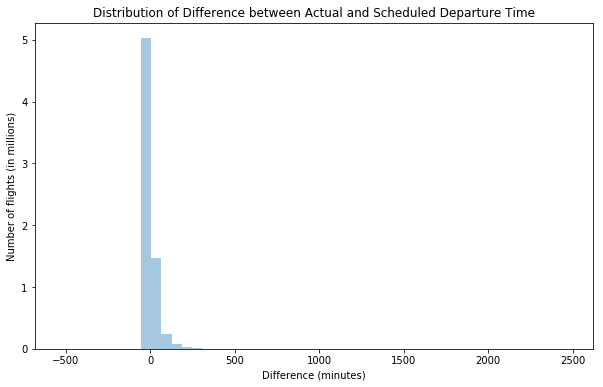

In [51]:
plt.figure(figsize = (10, 6))
sb.distplot(departure_delay.DepDelay, kde = False)

plt.title("Distribution of Difference between Actual and Scheduled Departure Time")
plt.xlabel("Difference (minutes)")
plt.ylabel("Number of flights (in millions)")

ticks3 = np.array([n for n in range(0, 6)])
plt.yticks(ticks3*1e6, ticks3);

In [52]:
departure_delay.DepDelay.min(), departure_delay.DepDelay.max()

(-534.0, 2467.0)

In [53]:
departure_delay[departure_delay.DepDelay < -90.0]

,Year,Month,Day,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Distance,Cancelled,CancellationReason,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Airline,Origin_city,Origin_state,Dest_city,Dest_state,DateTime
146340,2008,1,25,5,743,0915,1051,1105,188.0,110.0,77.0,-14.0,-92.0,533,False,NaN,False,NaN,NaN,NaN,NaN,NaN,Mesa Airlines Inc.,Atlanta,GA,Chantilly,VA,2008-01-25
5179806,2008,9,29,1,136,1030,456,1335,380.0,365.0,355.0,-519.0,-534.0,2762,False,NaN,False,NaN,NaN,NaN,NaN,NaN,Hawaiian Airlines Inc.,Las Vegas,NV,Honolulu,HI,2008-09-29


As shown above, there appears to be huge outliers for flights leaving earlier than 90 minutes than the scheduled departure time, and flights that leave over 120 minutes later than scheduled. 

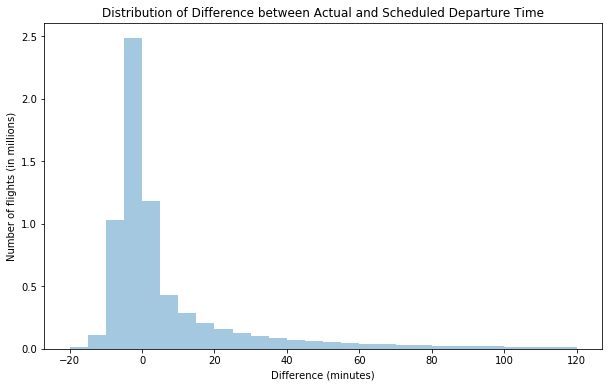

In [54]:
# Bins are cut into 5-minute intervals
bin_edges = [i for i in range(-20, 121, 5)]
plt.figure(figsize = (10, 6))
sb.distplot(departure_delay.DepDelay, bins = bin_edges, kde = False)

plt.title("Distribution of Difference between Actual and Scheduled Departure Time")
plt.xlabel("Difference (minutes)")
plt.ylabel("Number of flights (in millions)")

ticks4 = np.array([n/2 for n in range(0, 6)])
plt.yticks(ticks4*1e6, ticks4);

Looking at the distribution, it follows a postive (right skew), wth the majority of flights leaving around the time of scheduled depature time. The peak lies between -5 and 0 minutes of depature delay, suggesting that many flights leave slightly earlier than scheduled. As the difference in the actual and scheduled depatrue time increases, the number of flights that fall into these bins decreases.

Another plot that can represent additional information, such as lower quartile, median, upper quartile, and range can be represented by a boxplot. As it contains many outliers, we will only look at the boxplot of the main section of interest. 

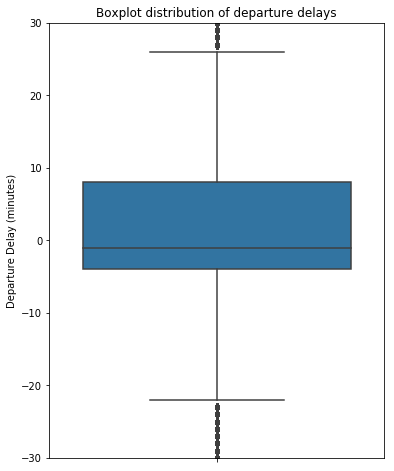

In [55]:
plt.figure(figsize = (6, 8))
sb.boxplot(data = departure_delay, y = "DepDelay")
plt.ylim([-30, 30])
plt.title("Boxplot distribution of departure delays")
plt.ylabel("Departure Delay (minutes)");

From the boxplot, it confirms that the distribution is a postive (right) skew. The median lies just below 0 minutes which indicate that more than 50% of flights depart earlier than the scheduled time of flight. Furthermore, 75% of flight depart within less than 10 minutes of scheduled time flight.

#### `ArrDelay` 

**What is the distribution of the difference between actual and scheduled arrival time?**

In [56]:
# First remove the flights that have NaN values
arrival_delay = f2008_clean[f2008_clean.ArrDelay.notnull()]

Below, outliers will already be taken into consideration and removed to view the distribtion, similar to `DepDelay`. 

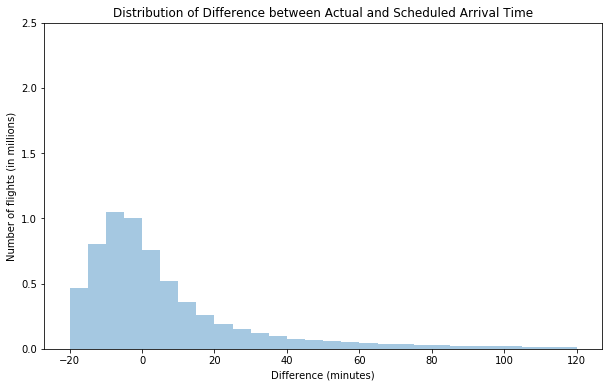

In [57]:
plt.figure(figsize = (10, 6))
sb.distplot(arrival_delay.ArrDelay, bins = bin_edges, kde = False)

plt.title("Distribution of Difference between Actual and Scheduled Arrival Time")
plt.xlabel("Difference (minutes)")
plt.ylabel("Number of flights (in millions)")
plt.yticks(ticks4*1e6, ticks4);

The distribution follows a distribution with a positive (right) skew, similar to the previous section on `DepDelay`. However, there is no real well-defined peak, with the actual arrival delay time more spread out rather than being focussed within a 5 minute interval bins as with the previous plot. We can also represent this information with a violinplot.

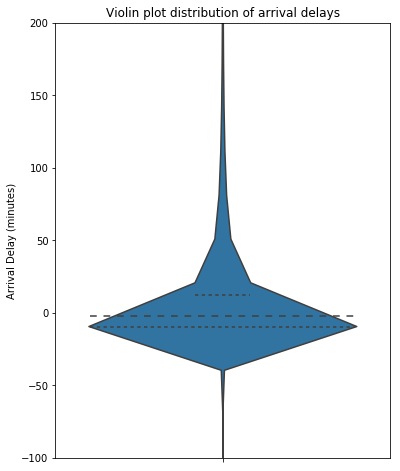

In [58]:
plt.figure(figsize = (6, 8))
sb.violinplot(data = arrival_delay, y = "ArrDelay", inner = "quartile")
plt.ylim([-100, 200])
plt.title("Violin plot distribution of arrival delays")
plt.ylabel("Arrival Delay (minutes)");

The distribution for `ArrDelay` is positive (right skew) although not as pronounced as in `DepDelay`. The median lies roughly at 0 minutes so around 50% of flight arrive on time or earlier. 

To compare the distribution between `ArrDelay` and `DepDelay`, the next section (bivariate exploration) will explore this further.

#### `CRSDepTime` 

**Are there more flights scheduled at a particular hour of the day?**

In [59]:
f2008_clean.CRSDepTime[0:5]

0    1955
1    0735
2    0620
3    0930
4    1755
Name: CRSDepTime, dtype: object

In [60]:
# Extract just the hours
hour = f2008_clean.CRSDepTime.astype(str).str[:2]
hour.value_counts()

06    504061
07    481275
08    481092
13    463748
11    461657
09    458725
17    457092
16    455096
10    447779
12    437126
14    432680
15    420026
18    416250
19    395470
20    271335
21    246521
22     85488
05     48436
23     31867
00      8877
01      2836
04       933
02       818
03       540
Name: CRSDepTime, dtype: int64

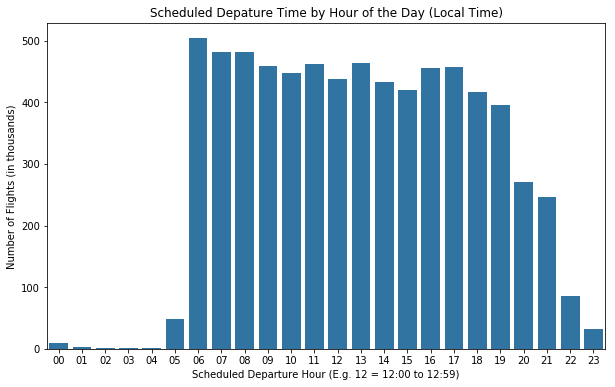

In [61]:
plt.figure(figsize = (10, 6))
sb.countplot(hour, color = base_color)

plt.title("Scheduled Depature Time by Hour of the Day (Local Time)")
plt.xlabel("Scheduled Departure Hour (E.g. 12 = 12:00 to 12:59)")
plt.ylabel("Number of Flights (in thousands)")
ticks5 = np.array([n for n in range(0, 600, 100)])
plt.yticks(ticks5*1000, ticks5);

This plot shows an interesting insight. Very few flights are scheduled between 23:00 and 5:59, with the fewest between 01:00 and 04:59. From 6:00 to 17:59, the number of flights scheduled are high, with 6:00 to 8:59 being the highest. Then from 17:59 the number of flights start to drop off sequentially. 

#### `AirTime` 

**What is the distribution of the duration of the aircraft in air?**

Before continuing, we find that some flights have NaN values of AirTime. They are associated with cancelled or diverted flights and will be ignored in this analysis.

In [62]:
# DF continuing all flights with a valid AirTime
airtime2008 = f2008_clean[f2008_clean.AirTime.notnull()]

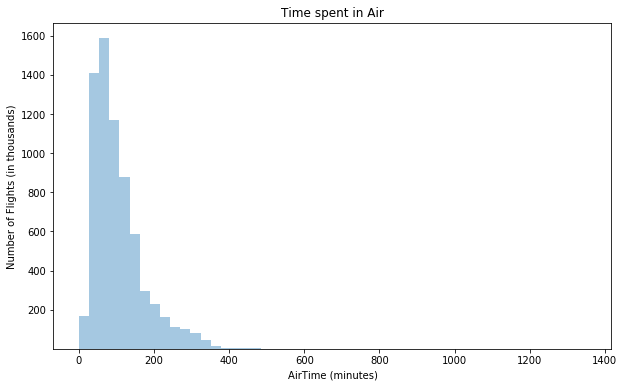

In [63]:
# AirTime is a quantitative variable, so a histogram is appropriate
plt.figure(figsize = (10, 6))
sb.distplot(airtime2008.AirTime, kde = False)

plt.title("Time spent in Air")
plt.xlabel("AirTime (minutes)")
plt.ylabel("Number of Flights (in thousands)")
ticks6 = np.array([n for n in range(200, 1700, 200)])
plt.yticks(ticks6*1000, ticks6);

From the initial plot, there appears to be quite a few outliers in `AirTime`. After closer inspection, the outliers are mainly due to flights to and from Honolulu, Hawaii, which is located in the middle of the Pacific Ocean and far away from mainland USA.

In [64]:
f2008_clean[f2008_clean.AirTime > 400].Origin_city.value_counts()

Honolulu             3400
Dallas-Fort Worth    1096
Chicago               873
Houston               848
Atlanta               741
Denver                490
Newark                398
Minneapolis           365
Kahului               273
Kailua/Kona           221
Boston                129
San Juan              124
New York               84
Covington              65
Anchorage              44
Phoenix                31
Miami                  16
Salt Lake City         16
Los Angeles            15
Philadelphia            8
Las Vegas               7
Seattle                 6
Lihue                   3
Orlando                 2
Detroit                 2
Sacramento              2
San Jose                1
San Diego               1
Islip                   1
Name: Origin_city, dtype: int64

When `AirTime` is plotted without outliers (above 400 minutes), the following histogram is obtained. 

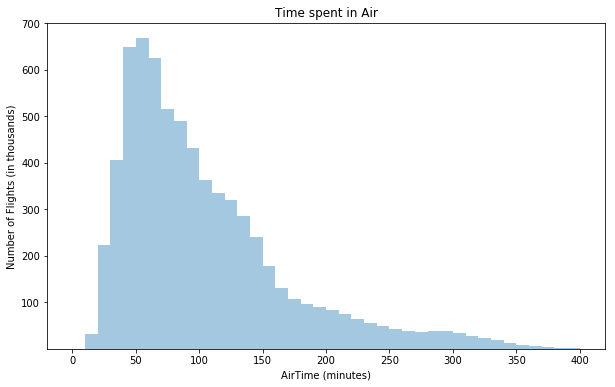

In [65]:
# Plot without outliers. 
bin_edges = [num for num in range(0, 401, 10)]
plt.figure(figsize = (10, 6))

sb.distplot(airtime2008.AirTime, kde = False, bins = bin_edges)
plt.title("Time spent in Air")
plt.xlabel("AirTime (minutes)")
plt.ylabel("Number of Flights (in thousands)")
ticks7 = np.array([n for n in range(100, 800, 100)])
plt.yticks(ticks7*1000, ticks7);

The histogram shows that `AirTime` follows a positive (right) skew distribution, with peaks at around 50-70 minutes. This indicates that flights within the US tend to be short, with majority of flights taking less than 2.5 hours. 

#### `Distance`

**What is the distribution of distances travelled by aircrafts?**

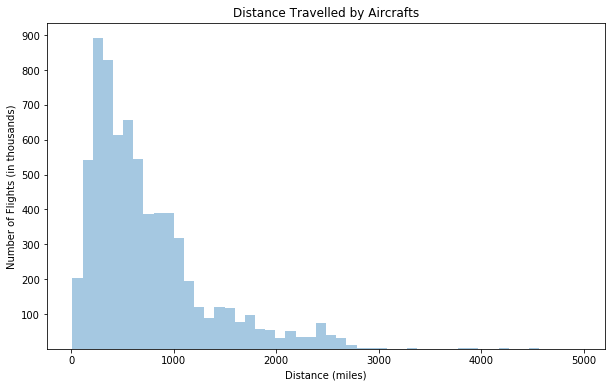

In [66]:
# Distance is a quantitative variable, so a histogram is appropriate
plt.figure(figsize = (10, 6))
sb.distplot(f2008_clean.Distance, kde = False)

plt.title("Distance Travelled by Aircrafts")
plt.xlabel("Distance (miles)")
plt.ylabel("Number of Flights (in thousands)")
ticks8 = np.array([n for n in range(100, 1000, 100)])
plt.yticks(ticks8*1000, ticks8);

In [67]:
f2008_clean[f2008_clean.Distance > 3000].Origin_city.value_counts()

Honolulu             3806
Dallas-Fort Worth    1251
Houston               908
Chicago               862
Atlanta               752
Denver                620
Anchorage             565
Kahului               529
Minneapolis           366
Newark                362
Kailua/Kona           266
San Juan              144
Los Angeles           144
Covington              90
Lihue                  45
Name: Origin_city, dtype: int64

As expected, there are also outliers of distance travelled, mainly associated with flights from and to Honolulu, Hawaii. 

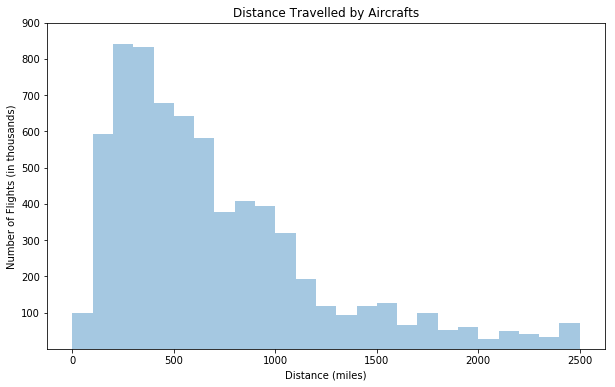

In [68]:
bin_edges2 = [num for num in range(0, 2501, 100)]
plt.figure(figsize = (10, 6))

sb.distplot(f2008_clean.Distance, kde = False, bins = bin_edges2)
plt.title("Distance Travelled by Aircrafts")
plt.xlabel("Distance (miles)")
plt.ylabel("Number of Flights (in thousands)")
plt.yticks(ticks8*1000, ticks8);

`AirTime` appears to be correlated with `Distance` as we would expect. The distribution for distances contain peaks between 200 and 400 miles. 

#### `Cancelled`  and  `Cancellation Reasons` 

**What is the proportion of flights cancelled?**

In [87]:
sorted_cancelled = f2008_clean.Cancelled.value_counts()
prop_cancelled = sorted_cancelled.values[1]/sum(sorted_cancelled.values)*100
prop_completed = 100 - prop_cancelled

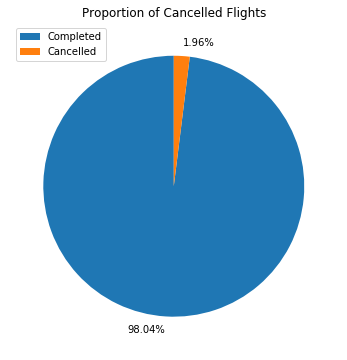

In [88]:
# Plotting pie chart showing the proportion of flights cancelled
plt.figure(figsize = [6, 6])
plt.pie(sorted_cancelled, startangle = 90,  
        labels = ['{:.2f}%'.format(prop_completed), '{:.2f}%'.format(prop_cancelled)])

plt.title("Proportion of Cancelled Flights")
plt.legend(labels = ["Completed", "Cancelled"], loc = 2);

Around 1.96% of flights are cancelled, or roughly one in fifty flights. 

**What are the reasons for cancellations?**

The following definitions for reasons for cancellations of flights are from [this website](https://www.bts.gov/topics/airlines-and-airports/understanding-reporting-causes-flight-delays-and-cancellations). 

- **Carrier**: The cause of the cancellation or delay was due to circumstances within the airline's control (e.g. maintenance or crew problems, aircraft cleaning, baggage loading, fueling, etc.).
- **Weather**: Significant meteorological conditions (actual or forecasted) that, in the judgment of the carrier, delays or prevents the operation of a flight such as tornado, blizzard or hurricane.
- **National Aviation System (NAS)**: Delays and cancellations attributable to the national aviation system that refer to a broad set of conditions, such as non-extreme weather conditions, airport operations, heavy traffic volume, and air traffic control.
- **Security**: Delays or cancellations caused by evacuation of a terminal or concourse, re-boarding of aircraft because of security breach, inoperative screening equipment and/or long lines in excess of 29 minutes at screening areas.

For delays analysis later on, the following definition will be useful.
- **Late-arriving aircraft**: A previous flight with same aircraft arrived late, causing the present flight to depart late.

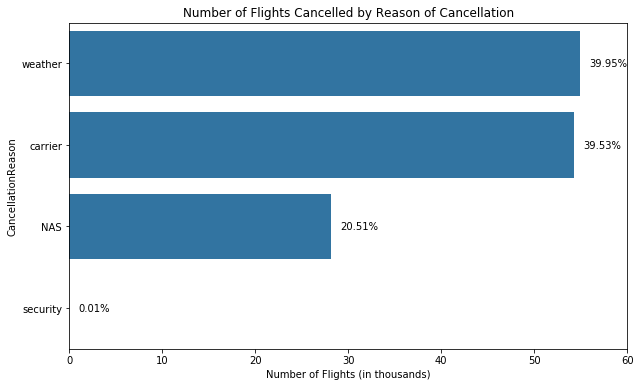

In [89]:
cancellation_reason = f2008_clean.CancellationReason.value_counts()

plt.figure(figsize = (10, 6))
sb.countplot(data = f2008_clean, y = "CancellationReason", order = cancellation_reason.index,
            color = base_color)
plt.title("Number of Flights Cancelled by Reason of Cancellation")
plt.xlabel("Number of Flights (in thousands)")
ticks14 = np.array([n for n in range(0, 70, 10)])
plt.xticks(ticks14*1000, ticks14)


for i in range(cancellation_reason.shape[0]):
    count = cancellation_reason[i]
    percentage = '{:0.2f}%'.format(count/sum(cancellation_reason) * 100)
    plt.text(count + 1000, i, percentage, va = "center");

Up to 80% of cancellation of flights are split roughly evenly between the weather and the airline carrier. There are very few cancellations due to security reasons. 

#### `Diverted` 

**What is the proportion of flights diverted?**

In [90]:
sorted_diverted = f2008_clean.Diverted.value_counts()
diverted_prop = f2008_clean.Diverted.value_counts()[1]/sum(f2008_clean.Diverted.value_counts())*100
notdiverted_prop = 100 - diverted_prop

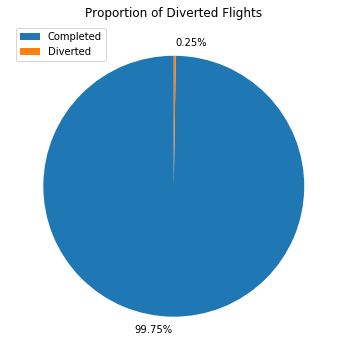

In [91]:
plt.figure(figsize = [6, 6])
plt.pie(sorted_diverted, startangle = 90, 
        labels = ['{0:.2f}%'.format(notdiverted_prop), '{0:.2f}%'.format(diverted_prop)])

plt.title("Proportion of Diverted Flights")
plt.legend(labels = ["Completed", "Diverted"], loc = 2);

Compared with cancelled flights, the proportion of diverted flights is even lower at 0.25%. 

#### `Airline` 

Which airline has the most and least flights scheduled?

In [92]:
airline_counts = f2008_clean.Airline.value_counts()
airline_counts[0:5]

Southwest Airlines Co.          1201754
American Airlines Inc.           604885
Skywest Airlines Inc.            567159
American Eagle Airlines Inc.     490693
US Airways Inc.                  453589
Name: Airline, dtype: int64

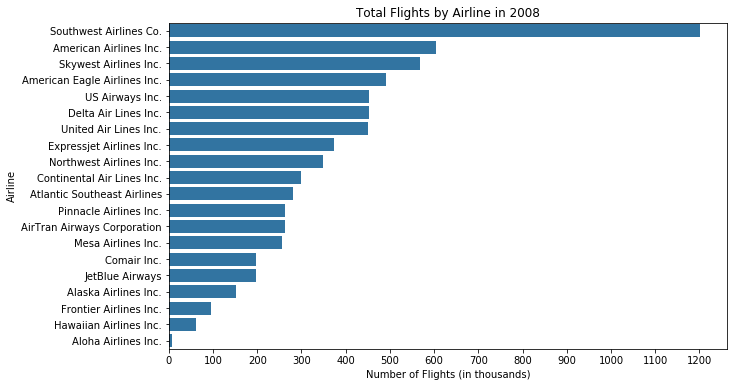

In [93]:
plt.figure(figsize = (10, 6))
sb.countplot(data = f2008_clean, y = "Airline", 
             order = airline_counts.index, color = base_color)

plt.title("Total Flights by Airline in 2008")
plt.xlabel("Number of Flights (in thousands)")
ticks9 = np.array([n for n in range(0, 1300, 100)])
plt.xticks(ticks9*1000, ticks9);

Southwest Airlines Co. is by far the airline with the most flights scheduled, almost double the second highest (American Airlines Inc.). On the other extreme, Aloha Airlines Inc. has scheduled by far the least number of flights.

#### `Origin_city` 

**What are the top 10 cities with the most flights scheduled to take off?**

In [94]:
top10_cities = f2008_clean.Origin_city.value_counts()[0:10]
top10_cities

Chicago              437999
Atlanta              414513
Dallas-Fort Worth    281281
Denver               241443
Houston              241105
New York             237939
Los Angeles          215608
Phoenix              199408
Las Vegas            172876
Detroit              161989
Name: Origin_city, dtype: int64

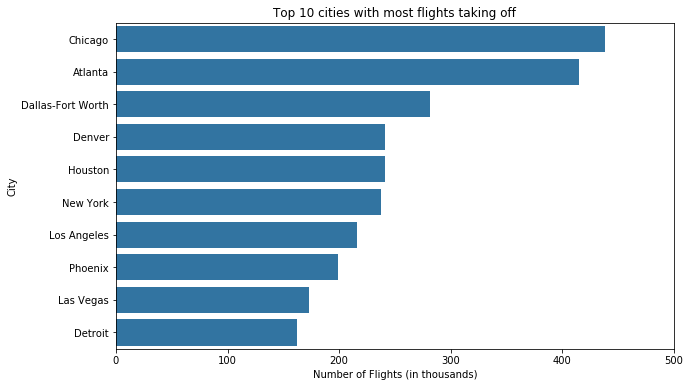

In [95]:
plt.figure(figsize = (10, 6))
sb.barplot(y = top10_cities.index, x = top10_cities.values, color = base_color)
plt.title("Top 10 cities with most flights taking off")
plt.xlabel("Number of Flights (in thousands)")
plt.ylabel("City")
ticks10 = np.array([n for n in range(0, 600, 100)])
plt.xticks(ticks10*1000, ticks10);

The top 3 cities are Chicago, Atlanta, and Dallas-Fort Worth. The top 10 cities have each over 160,000 flights departed in 2008. 

#### `Origin_state` 

**What are the top 3 states with the most flights scheduled to take off? What are the top 3 states with the least flights scheduled to take off?**

In [96]:
origin_states_top3 = f2008_clean.Origin_state.value_counts()[0:3]
origin_states_bot3 = f2008_clean.Origin_state.value_counts()[-3:]

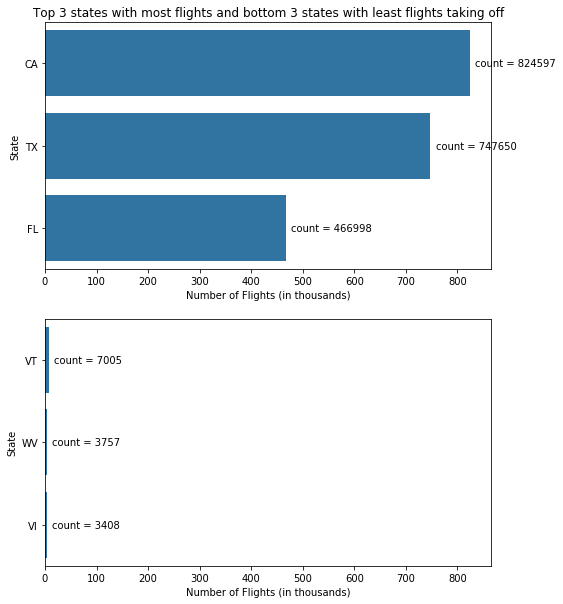

In [97]:
# Plotting two figures one on top of another
plt.figure(figsize = (8, 10))

ax1 = plt.subplot(211)
sb.barplot(y = origin_states_top3.index, x = origin_states_top3.values, color = base_color)
plt.title("Top 3 states with most flights and bottom 3 states with least flights taking off")
plt.xlabel("Number of Flights (in thousands)")
plt.ylabel("State")
ticks11 = np.array([n for n in range(0, 900, 100)])
plt.xticks(ticks11*1000, ticks11);

# Add count to each bar
for i in range(origin_states_top3.shape[0]):
    count = origin_states_top3[i]
    plt.text(count + 10000, i, "count = " + str(count), va = "center")

ax2 = plt.subplot(212, sharex = ax1)
sb.barplot(y = origin_states_bot3.index, x = origin_states_bot3.values, color = base_color)
plt.xlabel("Number of Flights (in thousands)")
plt.ylabel("State")
plt.xticks(ticks11*1000, ticks11);

for i in range(origin_states_bot3.shape[0]):
    count = origin_states_bot3[i]
    plt.text(count + 10000, i, "count = " + str(count), va = "center")

As shown above, California, Texas, and Florida are the top three states (in descending order) with the most flights scheduled. On the other end of the spectrum, Vermont, West Virginia, and United States Virgin Islands have the least number of flights (in descending order). 

<a id="unicon"></a>
### Analysis and Insights of Univariate Exploration
Jump back to <a href="#uni"> Univariate Visualisations </a>

Of the features you investigated, some of the data needed to be tidied, adjusted, or changed:

- Time need to be in four digits, so a zero is filled for any three digit timings.
- AirTime NaN values are due to diverted and cancelled flights.
- AirTime and Distance contain outliers. These are all the flights to and from airports in Hawaii.
- CancellationReason has been changed from Code to written reason

The following interesting insights have been found:

<a id="1i"></a>
- **Number of Flights by `Day`**
    - The number of flights follows a spike drop pattern with certain days experiencing a huge drop, and appearing in regular intervals. This drop is investigated further on what day of the week experiences a lower number of flights. In addition, there is a particular sharp drop on 27 November 2008. After googling, there does not appear any significant event that would explain this drop.
    - Plotting the 7-day moving average does not reveal any particular pattern. It can be seen that in February there is a slight dip before rising and staying fairly constant between March and May. The peaks in the number of flights are in July and August, and towards the end of August and beginning of September, there is a noticeable significant fall in the number of flights.
- **`Month`**
    - The months with the most flights scheduled are July, March, and August. Why are there more flights in these months? July and August are holiday periods for schools and many employees from businesses go on holidays, so this could explain the higher number of flights.
    - Also it turns out that in 2008, Easter falls on 23 March so could this be a reason for more people going on vacation so therefore more flights being scheduled? 
    - The month with the least flight scheduled is November. The difference between the lowest and highest number (July) of flights scheduled by month is almost 100,000 flights or around 17% lower. 
    - Interestingly, December has the third least number flights scheduled. Perhaps during festive periods and pre New Year, many families may prefer to celebrate with one another?
- **`DayOfWeek`**
    - During the weekdays (Mondays to Fridays), the number of flights scheduled are very similar. On the weekends (Saturdays and Sundays), the number of flights are unusually lower, with Saturdays experiencing a significant dip (up to 17% lower compared with the average weekday).
    - This is rather unexpected as we may have expected a higher number of flights during weekends where people are more likely to go on short weekend holiday nearby. However, this is not the case. Could the higher volume of flights during weekdays be due to the increased travels of businessmen and businesswomen during weekdays, and very little on the weekends? Or could this be due to airlines which may set higher prices on the weekends, therefore lowering the demand and schedule fewer flights?
    - In addition, the lower number of flights on Saturday may be contributing to the steep drop seen from the first visualisation of number of flights by day.
- **`DepDelay`** and **`ArrDelay`** 
    - the difference between actual and scheduled departure/arrival time follows a positive (right) skew with just over 50% of flights departing and arriving before the scheduled time. 
    - A positive skew may come from the vast majority of flights departing and arriving close to the expected time, with many more outliers located towards the higher end due to the uncertainty in timings from delays. On the other hand, generally we would not expect flights to depart or arrive significantly earlier than scheduled.
- **`CRSDepTime`** 
    - Very few flights are scheduled between 23:00 and 5:59, with the fewest between 01:00 and 04:59. Could the lack of the number of flights between 23:00 and 5:59 be due to the poor visibility at night compared with during the day? Or could this be due to lack of demand of passengers for flights late at night and before dawn? 
    -  From 6:00 to 17:59, the number of flights scheduled are high, with 6:00 to 8:59 being the highest. Then from 17:59 the number of flights start to drop off sequentially. Could the prime time for businessmen and businesswomen to travel to work by plane at the early hours of the morning arriving at work before 9:00?
- **`AirTime`** and **`Distance`**
    - The time of aircraft in air in US routes follows a positive (right) skew distribution, with peaks at around 50-70 minutes. Flight times tend to be short, with majority of time in air taking less than 2.5 hours. 
    - AirTime appears correlated with Distance as we would expect. The further away the airports, the higher the time in air. The distribution for distances contain peaks between 200 and 400 miles. 
- **`Cancelled`** and **`CancellationReason`**
    - About 1.96% (or one in 51) of flights are cancelled in 2008. 
    - The main reasons for cancellations are due to airline carrier or weather, each occurring around 40% of the cancellations. This is followed by National Aviation System (NAS) at around 20%. Very few flights are cancelled due to security reasons.
- **`Diverted`**
    - About 0.25% (one in 400) of flights are diverted in 2008.
- **`Airline`** 
    - Southwest Airlines Co. have by far the most scheduled flights (over 1.2 million), and almost double the number of the second highest. 
    - Aloha Airlines Inc. has scheduled by far the least number of flights (7,800).
- **`Origin_city`**
    - The top three cities with the highest number of scheduled departure flights are Chicago, Atlanta, and Dallas-Fort Worth. 
    - According to [Wikipedia](https://en.wikipedia.org/wiki/List_of_United_States_cities_by_population), Chicago, Atlanta, and Dallas-Fort Worth are 3rd, 37th, and 9th most populous city in the US. New York has the highest population but is 6th on the list above. It appears that the there is no correlation between the population and number of flights.
- **`Origin_state`** 
    - California, Texas, and Florida are the top three states with the highest number of scheduled departure flights. According to [Wikipedia](https://simple.wikipedia.org/wiki/List_of_U.S._states_by_population), California, Texas, and Florida are the top three states with the highest population. 
    - The three states with the lowest number of flights are United States Virgin Islands, West Virginia, and Vermont. US Virgin Islands and Vermont are indeed states with one of the lowest population, although West Virginia is 38th most populous.
    - This observation suggest that there could be a correlation between the population of the states and the number of flights scheduled.

<a id="bi"></a>
## Bivariate Exploration

In bivariate exploration, the relationships between two variables are explored. Firstly, a **correlation matrix** will be plotted to provide an overview and potential interesting correlation between each pair of quantitative variables. 

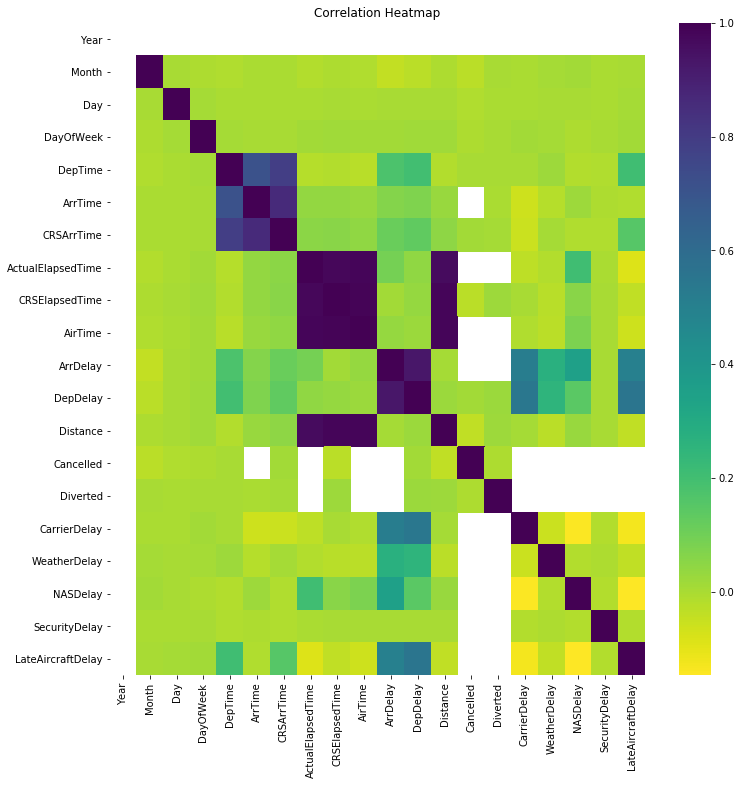

In [98]:
plt.figure(figsize = (12, 12))
sb.heatmap(f2008_clean.corr(), cmap = "viridis_r")
plt.title("Correlation Heatmap");

From the correlation heatmap, there appears to several groups of variables which have strong positive correlation with one another. These are:
- `DepTime`, `ArrTime`, and `CRSArrTime` (Pearson correlation coefficient r > 0.6)
- `ActualElapsedTime`, `CRSElapsedTime`, and `AirTime` (r close to 1)
- `DepDelay` and `ArrDelay` (r > 0.8)

In addition, `Distance` appears to be strongly correlated with `ActualElapsedTime`, `CRSElapsedTime`, and `AirTime` as we would expect. Furthemore, most type of delays (apart from `SecurityDelay`) appear to have a weak postive correlation with `ArrDelay` and `DepDelay`. 

In this section of bivariate exploration, the year **2008** will be explored. There will be one visual comparing the different years. First, the visualisations to each question along with comments on it will be given. Then at the end of the section, interesting insights, interpretations and questions will be provided. 


1. `Month` and `Cancelled` - are there particular months where more flights are cancelled?
2. `Month` and `CancellationReason` - are there particular months where more flights are cancelled for a particular reason?
3. `ActualElapsedTime` and `CRSElapsedTime` - what is the distribution of the differences between actual elapsed time and scheduled elapsed time of flight? 
4. `DepDelay` and `ArrDelay` - how are the depature and arrival delays distributed?
5. `AirTime` and `Distance` - how closely do time in the air and distance travelled correlate?
6. `Distance` and `Airline` - do certain airlines favour short-haul or long-haul flights?
7. `Airline` and `CarrierDelay` - are there certain airlines where more delays occur due to carrier delay?
8. `Airline` and `LateAircraftDelay` - are there certain airlines where more delays occur due to late aircraft arrival?
9. `Origin_city` and `WeatherDelay` -  are there certain departure cities where more delays occur due to the weather?

Jump to <a href="#bicon">Bivariate Insights and Interpretations</a>

#### `Month` and `Cancelled` 

**Are there particular months where more flights are cancelled?**

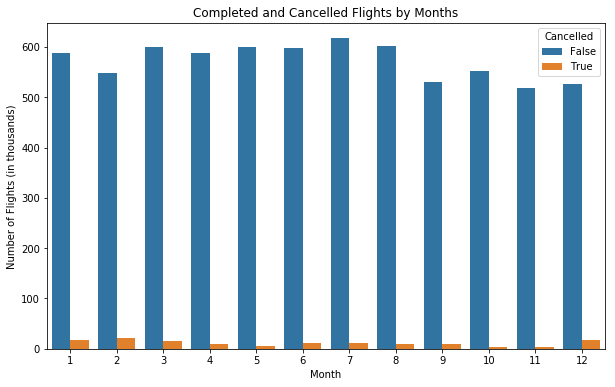

In [99]:
# Month and Cancelled are both qualitative variables so a clustered bar chart is appropriate
plt.figure(figsize = (10, 6))
sb.countplot(data = f2008_clean, x = "Month", hue = "Cancelled")
plt.title("Completed and Cancelled Flights by Months")
plt.ylabel("Number of Flights (in thousands)")
ticks12 = np.array([n for n in range(0, 700, 100)])
plt.yticks(ticks12*1000, ticks12);

The plot above does not give a good indication whether there is a relationship between month and cancelled flights. Rather than looking at the absolute number of completed and cancelled flights, the proportions of cancelled flights may be better.

In [100]:
cancelled_month = f2008_clean.groupby("Month").Cancelled.sum()
total_month = f2008_clean.groupby("Month").Cancelled.count()
cancelled_prop = cancelled_month/total_month
cancelled_prop

Month
1     0.028572
2     0.036182
3     0.026267
4     0.017312
5     0.010274
6     0.017959
7     0.016878
8     0.016063
9     0.018327
10    0.005841
11    0.008519
12    0.032625
Name: Cancelled, dtype: float64

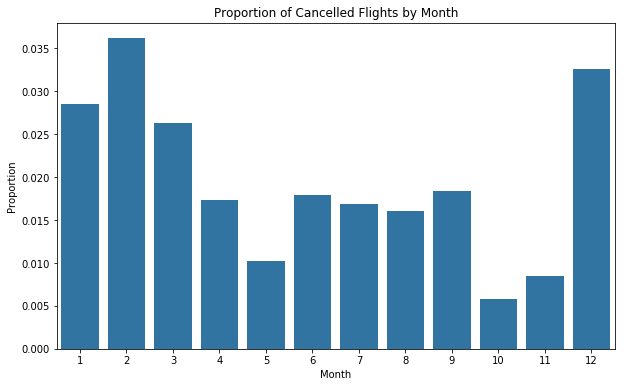

In [101]:
plt.figure(figsize = (10, 6))
sb.barplot(cancelled_prop.index, cancelled_prop.values, color = base_color)
plt.title("Proportion of Cancelled Flights by Month")
plt.ylabel("Proportion");

Above shows the proportion of flights cancelled in 2008 is highest in February, December and January (in that order), and lowest in October and November (in ascending order). Perhaps looking at `CancellationReason` by `Month` could provide further insights.

#### `Month` and `CancellationReason` 

Are there particular months where more flights are cancelled for a particular reason?

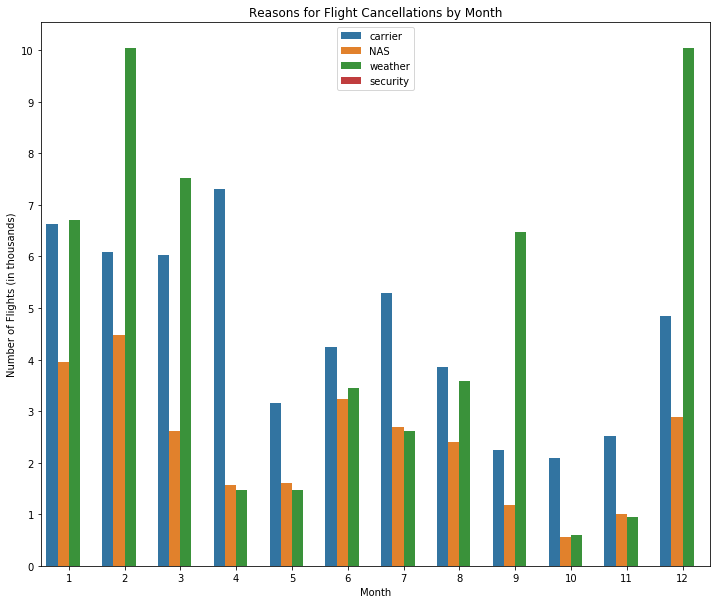

In [102]:
plt.figure(figsize = (12, 10))
sb.countplot(data = f2008_clean, x = "Month", hue = "CancellationReason")
plt.title("Reasons for Flight Cancellations by Month")
plt.ylabel("Number of Flights (in thousands)")
plt.legend(loc = 9)
ticks13 = np.array([n for n in range(0, 11)])
plt.yticks(ticks13*1000, ticks13);

Interestingly, for February and December (the two months with highest number of cancellations) the main reason for cancellations are due to bad weather. January (the third highest number of cancellations) has a fairly similar number of cancellations due to weather and carrier, with both numbers still high. There are very very few cancellations due to security reasons. 

#### `ActualElapsedTime` and `CRSElapsedTime` 

**What is the distribution of the actual elapsed time and scheduled elapsed time of flight?**

In [103]:
# upper and lower bound of elapsed time
lower = min(f2008_clean.ActualElapsedTime.min(), f2008_clean.CRSElapsedTime.min()).astype(int)
upper = max(f2008_clean.ActualElapsedTime.max(), f2008_clean.CRSElapsedTime.max()).astype(int)
(lower, upper)

(-141, 1435)

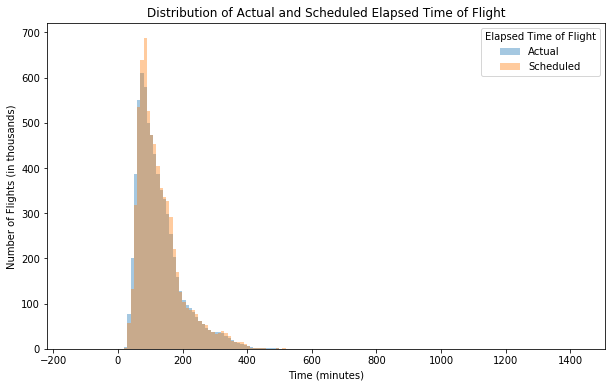

In [113]:
bin_edges = [n for n in range(lower, upper, 10)]
plt.figure(figsize = (10, 6))
sb.distplot(f2008_clean.ActualElapsedTime, kde = False, label = "Actual", bins = bin_edges)
sb.distplot(f2008_clean.CRSElapsedTime, kde = False, label = "Scheduled", bins = bin_edges)

plt.title("Distribution of Actual and Scheduled Elapsed Time of Flight")
plt.xlabel("Time (minutes)")
plt.ylabel("Number of Flights (in thousands)")
ticks15 = np.array([n for n in range(0, 800, 100)])
plt.yticks(ticks15*1e3, ticks15)
plt.legend(title = "Elapsed Time of Flight");

To see the distribution more clearly, outliers (less than zero minutes and greater than 400 minutes) will be removed.

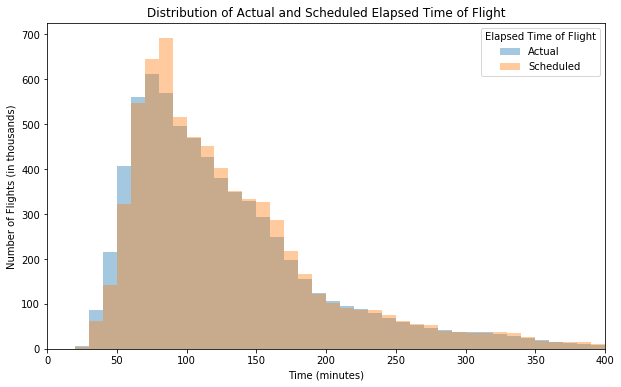

In [114]:
bin_edges = [n for n in range(0, 401, 10)]
plt.figure(figsize = (10, 6))
sb.distplot(f2008_clean.ActualElapsedTime, kde = False, label = "Actual", bins = bin_edges)
sb.distplot(f2008_clean.CRSElapsedTime, kde = False, label = "Scheduled", bins = bin_edges)

plt.title("Distribution of Actual and Scheduled Elapsed Time of Flight")
plt.xlabel("Time (minutes)")
plt.ylabel("Number of Flights (in thousands)")
ticks15 = np.array([n for n in range(0, 701, 100)])
plt.yticks(ticks15*1e3, ticks15)
plt.legend(title = "Elapsed Time of Flight")
plt.xlim([0, 400]);

The distribution of both actual and scheduled elapsed time are very similar, with a weak positive (right) skew, peaking between 70 and 90 minutes.

#### `DepDelay` and `ArrDelay`

**How are the departure and arrival delays distributed?**

Would you expect a very similar distribution for departure and arrival delays or will it be different? If it is the latter, how will it be different?

In [115]:
# DF containing non-null values for departure and arrival delays
dep_arr_delay = f2008_clean[f2008_clean.DepDelay.notnull()]
dep_arr_delay = dep_arr_delay[dep_arr_delay.ArrDelay.notnull()]

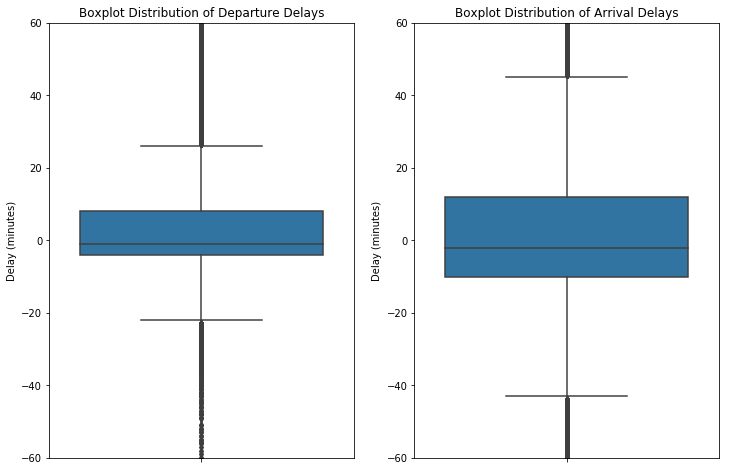

In [116]:
plt.figure(figsize = (12, 8))

plt.subplot(121)
sb.boxplot(data = dep_arr_delay, y = "DepDelay")
plt.ylim([-60, 60])
plt.title("Boxplot Distribution of Departure Delays")
plt.ylabel("Delay (minutes)");

plt.subplot(122)
sb.boxplot(data = dep_arr_delay, y = "ArrDelay")
plt.ylim([-60, 60])
plt.title("Boxplot Distribution of Arrival Delays")
plt.ylabel("Delay (minutes)");

From the plot above, we can see that the interquartile range IQR (upper minus lower quartile) is larger for arrival delays. As shown below using the "describe" method, the IQR for departure delay is 12 minutes compared with arrival delay of 22 minutes. Consequently, the range (excluding outliers) are also significantly higher. The median for both departure and arrival delays are fairly similar at -1 and -2 minutes, respectively. Both contain many outliers indicated by points beyond the T-shaped lines which are connected above and below the box.

In [117]:
dep_arr_delay[["DepDelay", "ArrDelay"]].describe()

,DepDelay,ArrDelay
count,6.855029e+06,6.855029e+06
mean,9.923845e+00,8.168452e+00
std,3.520386e+01,3.850194e+01
min,-5.340000e+02,-5.190000e+02
25%,-4.000000e+00,-1.000000e+01
50%,-1.000000e+00,-2.000000e+00
75%,8.000000e+00,1.200000e+01
max,2.467000e+03,2.461000e+03


#### `AirTime` and `Distance` 

**How closely do time in the air and distance travelled correlate?**

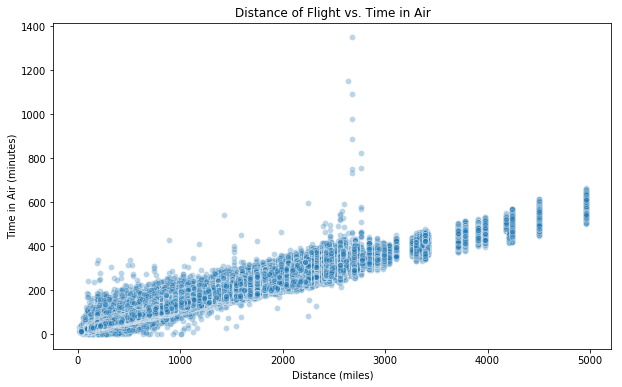

In [118]:
plt.figure(figsize = (10, 6))
sb.scatterplot(data = f2008_clean, x = "Distance", y = "AirTime", alpha = 0.3)
plt.title("Distance of Flight vs. Time in Air")
plt.xlabel("Distance (miles)")
plt.ylabel("Time in Air (minutes)");

There appears to be a thick positive upward sloping line that suggest what is expected - the further the distance between the origin and destination, the greater the time in air. However, there are quite a few flights which do not lie in this thick band. In particular, the points at a distance 2700-2800 miles which form an almost vertical line suggest that the time in flight varies hugely. This is explored below.

In [119]:
f2008_clean[f2008_clean.AirTime > 700]

,Year,Month,Day,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Distance,Cancelled,CancellationReason,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Airline,Origin_city,Origin_state,Dest_city,Dest_state,DateTime
1556682,2008,3,6,4,906,0905,2103,1315,837.0,370.0,823.0,468.0,1.0,2762,False,NaN,False,468.0,0.0,0.0,0.0,0.0,Hawaiian Airlines Inc.,Las Vegas,NV,Honolulu,HI,2008-03-06
2160490,2008,4,27,7,1343,1340,748,2215,905.0,335.0,886.0,573.0,3.0,2677,False,NaN,False,573.0,0.0,0.0,0.0,0.0,Hawaiian Airlines Inc.,Honolulu,HI,Seattle,WA,2008-04-27
2763487,2008,5,24,6,920,0920,519,1205,1379.0,345.0,1350.0,1034.0,0.0,2677,False,NaN,False,1034.0,0.0,0.0,0.0,0.0,Hawaiian Airlines Inc.,Seattle,WA,Honolulu,HI,2008-05-24
2763567,2008,5,11,7,1228,1230,811,2105,1003.0,335.0,981.0,666.0,-2.0,2677,False,NaN,False,648.0,0.0,0.0,0.0,18.0,Hawaiian Airlines Inc.,Honolulu,HI,Seattle,WA,2008-05-11
2763603,2008,5,16,5,1021,1035,303,1320,1182.0,345.0,1154.0,823.0,-14.0,2640,False,NaN,False,823.0,0.0,0.0,0.0,0.0,Hawaiian Airlines Inc.,Seattle,WA,Kahului,HI,2008-05-16
3993887,2008,7,16,3,228,0230,1250,520,802.0,350.0,757.0,450.0,-2.0,2762,False,NaN,False,450.0,0.0,0.0,0.0,0.0,Hawaiian Airlines Inc.,Las Vegas,NV,Honolulu,HI,2008-07-16
4614554,2008,8,19,2,1547,1230,717,2105,750.0,335.0,733.0,612.0,197.0,2677,False,NaN,False,612.0,0.0,0.0,0.0,0.0,Hawaiian Airlines Inc.,Honolulu,HI,Seattle,WA,2008-08-19
5180146,2008,9,9,2,1411,0920,545,1215,1114.0,355.0,1091.0,1050.0,291.0,2677,False,NaN,False,1040.0,0.0,0.0,0.0,10.0,Hawaiian Airlines Inc.,Seattle,WA,Honolulu,HI,2008-09-09
5180166,2008,9,29,1,920,0920,1912,1215,772.0,355.0,753.0,417.0,0.0,2677,False,NaN,False,417.0,0.0,0.0,0.0,0.0,Hawaiian Airlines Inc.,Seattle,WA,Honolulu,HI,2008-09-29


Most of the flights that lies in the thin vertical line (9 flights) covers a distance between 2677 and 2762 miles, all of which cover the route between a Hawaii airport and Las Vegas or Seattle. Seven of the 9 flights leave roughly on time but arrive at the destination a lot later. The arrival delay are all due to carrier delay, although it is not clear what happens to the aircraft during this carrier delay as the aircraft appears to be in air. The other two flights depart significantly later (over three hours) but still has a carrier delay. These flights appear to be outliers.

#### `Distance` and `Airline` 

**Do certain airlines favour short-haul or long-haul flights?**

To address this question, the distribution of distance of flights made by each airline will be created. 

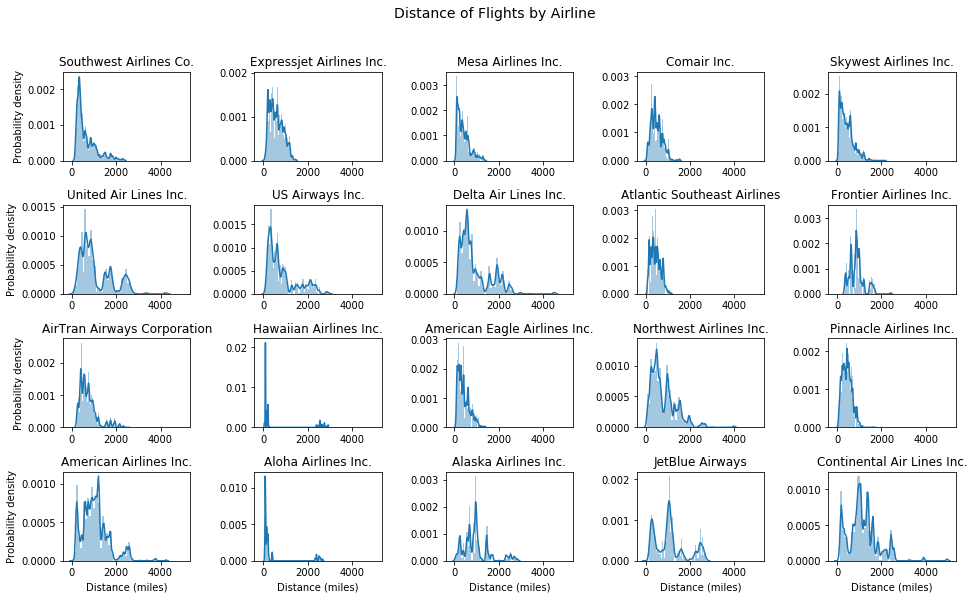

In [32]:
airlines = f2008_clean.Airline.unique()
location = [i for i in range(1, 21)]

fig = plt.figure(figsize = (16, 9))
plt.suptitle("Distance of Flights by Airline", size = 14)

# Share axes with plot with highest values on axis
ax3 = plt.subplot(5, 4, 20)

# Create space between plots
fig.subplots_adjust(wspace = 0.5, hspace = 0.5)

for airline, loc in zip(airlines, location):
    ax = plt.subplot(4, 5, loc, sharex = ax3)
    airline_plot = f2008_clean[f2008_clean.Airline == airline]
    sb.distplot(airline_plot.Distance)
    plt.title(airline)
    plt.xlabel("")
    if loc >= 16:
        plt.xlabel("Distance (miles)")
    if loc % 5 == 1:
        plt.ylabel("Probability density");

There are some really interesting insights provided by these plots. Three are described below.

- Many airlines operate flights under 2000 miles, including Southwest Airlines Co., Expressjet Airlines Inc., Mesa Airlines Inc., Comair Inc., Skywest Airlines Inc., Atlantic Southeast Airlines, American Eagle Airlines Inc., and Pinnacle Airlines Inc.
- Both Hawaiian Airlines Inc. and Aloha Airlines Inc. have a pronounced bimodal peaks. The peaks at short distances correspond to flights between Hawaiian airports (e.g. Honolulu, Kahului, Lihue), and the peaks at distances above 2000 miles are flights to Californian cities (e.g. Santa Ana, Oakland, Sacramento). This is expected as Hawaii is an island far off the coast of the US, and either airlines will fly to another Hawaiian city or to mainland - thus showing the bimodal relationship.
- Several airlines operate many different routes at different distances shown by the multimodal peaks, such as United Air Lines Inc., Delta Air Lines Inc., American Airlines Inc., Alaska Airlines Inc., JetBlue Airways, and Continental Air Lines Inc. 

In [121]:
hawaii = f2008_clean[f2008_clean.Airline == "Aloha Airlines Inc."]
hawaii["Origin_city"].value_counts()

Honolulu       3215
Kahului        1348
Lihue          1000
Kailua/Kona     891
Hilo            532
Santa Ana       303
Oakland         184
Sacramento      118
San Diego        89
Reno             60
Las Vegas        60
Name: Origin_city, dtype: int64

#### `Airline` and `CarrierDelay` 

**Are there certain airlines where more delays occur due to carrier delay?**

First, the total delay time due to carrier delay will be computed for each airline. 

In [122]:
# Groups by Airline and compute the total time delayed due to carrier delay
airline_carrier_delays = f2008_clean.groupby("Airline").CarrierDelay.sum()
airline_carrier_delays_order = airline_carrier_delays.sort_values(ascending = False)
airline_carrier_delays_order

Airline
American Airlines Inc.          2821907.0
Southwest Airlines Co.          2261002.0
Mesa Airlines Inc.              1927740.0
United Air Lines Inc.           1720150.0
American Eagle Airlines Inc.    1705271.0
Atlantic Southeast Airlines     1688969.0
Skywest Airlines Inc.           1678216.0
Northwest Airlines Inc.         1478247.0
Delta Air Lines Inc.            1411220.0
Expressjet Airlines Inc.        1218009.0
US Airways Inc.                 1109335.0
Comair Inc.                     1075766.0
Continental Air Lines Inc.       996161.0
Pinnacle Airlines Inc.           908509.0
JetBlue Airways                  677621.0
Alaska Airlines Inc.             481833.0
AirTran Airways Corporation      443708.0
Frontier Airlines Inc.           250971.0
Hawaiian Airlines Inc.           184855.0
Aloha Airlines Inc.                8727.0
Name: CarrierDelay, dtype: float64

Instead of calculating the total number flights delayed, it is a fairer comparison to compute the average number of minutes delayed per flight.

In [123]:
# Compute the average number of minutes delayed
airline_count = f2008_clean.groupby("Airline").count()["Year"]
carrier_delay_prop = (airline_carrier_delays/airline_count).sort_values(ascending = False)
carrier_delay_prop

Airline
Mesa Airlines Inc.              7.561841
Atlantic Southeast Airlines     6.019670
Comair Inc.                     5.443967
American Airlines Inc.          4.665196
Northwest Airlines Inc.         4.252088
United Air Lines Inc.           3.826680
American Eagle Airlines Inc.    3.475230
Pinnacle Airlines Inc.          3.464841
JetBlue Airways                 3.455646
Continental Air Lines Inc.      3.337726
Expressjet Airlines Inc.        3.252274
Alaska Airlines Inc.            3.188793
Delta Air Lines Inc.            3.122645
Hawaiian Airlines Inc.          2.989923
Skywest Airlines Inc.           2.958987
Frontier Airlines Inc.          2.620779
US Airways Inc.                 2.445683
Southwest Airlines Co.          1.881418
AirTran Airways Corporation     1.695587
Aloha Airlines Inc.             1.118846
dtype: float64

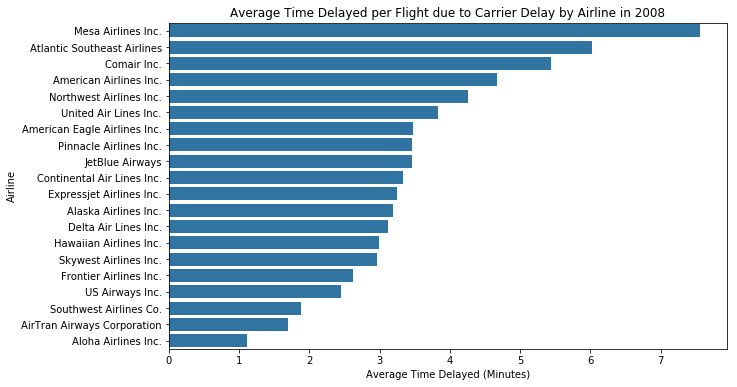

In [124]:
plt.figure(figsize = (10, 6))
sb.barplot(y = carrier_delay_prop.index, x = carrier_delay_prop.values,
          color = base_color)
plt.title("Average Time Delayed per Flight due to Carrier Delay by Airline in 2008")
plt.xlabel("Average Time Delayed (Minutes)");

From this barchart, it can be shown that Mesa Airlines Inc. has the highest average time delayed per flight due to carrier delay, over 1.5 minutes higher on average compared with the second highest: Atlantic Southeast Airlines. Aloha Airlines Inc. has the lowest average time delayed.

#### `Airline` and `LateAircraftDelay` 

**Are there certain airlines where more delays occur due to late aircraft arrival?**

As an extension to the previous analysis on `CarrierDelay`, this takes a look at late aircraft delay. 

In [125]:
# Calculates the average time delayed due to late aircraft arrival
late_delay = f2008_clean.groupby("Airline").LateAircraftDelay.sum()
airline_count = f2008_clean.groupby("Airline").count()["Year"]
late_delay_prop = (late_delay/airline_count).sort_values(ascending = False)

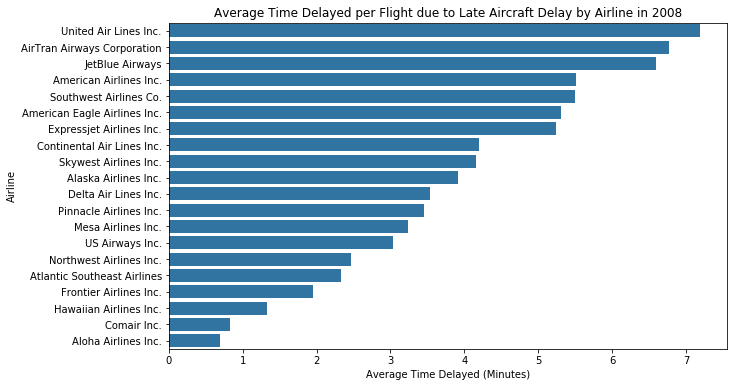

In [126]:
plt.figure(figsize = (10, 6))
sb.barplot(y = late_delay_prop.index, x = late_delay_prop.values, color = base_color)
plt.title("Average Time Delayed per Flight due to Late Aircraft Delay by Airline in 2008")
plt.xlabel("Average Time Delayed (Minutes)");

For Late Aircraft Delay, United Air Lines  Inc. has the highest average time delayed per flight. Aloha Airlines Inc., again, has the lowest average delayed time.

#### `Origin_city` and `WeatherDelay` 

Are there certain departure cities where more delays occur due to the weather?

In [127]:
# Groupby city and find the total number of flights delayed due to weather, and the total time of delay, and the average time delayed
weather_delay_origin_count = f2008_clean.groupby("Origin_city").WeatherDelay.count().sort_values(ascending = False)
weather_delay_origin_total = f2008_clean.groupby("Origin_city").WeatherDelay.sum().sort_values(ascending = False)

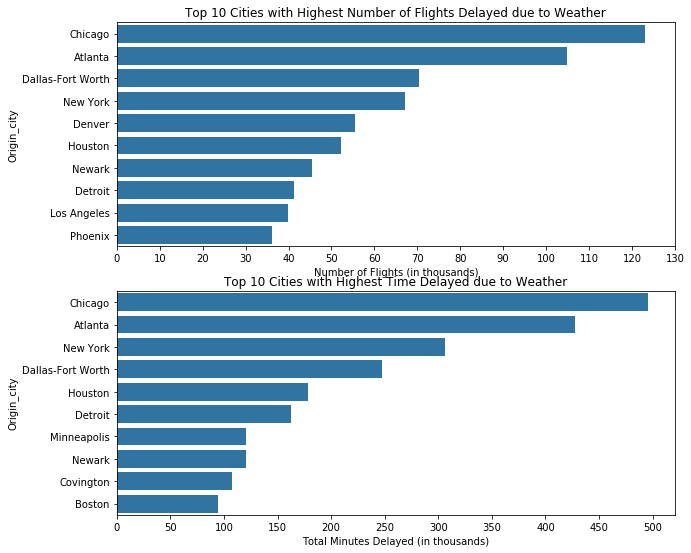

In [128]:
plt.figure(figsize = (10, 14))

plt.subplot(3, 1, 1)
sb.barplot(y = weather_delay_origin_count.index[0:10], x = weather_delay_origin_count.values[0:10], 
           color = base_color)
plt.title("Top 10 Cities with Highest Number of Flights Delayed due to Weather")
plt.xlabel("Number of Flights (in thousands)")
ticks18 = np.array([n for n in range(0, 140, 10)])
plt.xticks(ticks18*1000, ticks18);

plt.subplot(3, 1, 2)
sb.barplot(y = weather_delay_origin_total.index[0:10], x = weather_delay_origin_total.values[0:10], 
           color = base_color)
plt.title("Top 10 Cities with Highest Time Delayed due to Weather")
plt.xlabel("Total Minutes Delayed (in thousands)")
ticks19 = np.array([n for n in range(0, 501, 50)])
plt.xticks(ticks19*1000, ticks19); 

Chicago, Atlanta, Dallas-Fort Worth, New York, Housten, Newark, and Detroit is in the top 10 cities with the highest number of flights delayed and total cumulative time delayed in 2008.

<a id="bicon"></a>
### Analysis and Insights of Bivariate Exploration

The following interesting insights have been found:

- **`Cancelled` by `Month`**
    - The proportion of flights cancelled in 2008 is highest in February, December and January (in that order), and lowest in October and November. 
    - Could the highest proportion of cancellations between December-February be due to the cold and bad weather?
- **`CancellationReason` by `Month`** 
    - This provides further insights on the potential reasons why December-February have the highest proportions of cancellations. The main reason for cancellations is indeed due to bad weather for December and February. January has a fairly similar number of cancellations due to weather and carrier, with both numbers still high. 
    - Overall, there are very very few cancellations due to security reasons. 
- **`ActualElapsedTime` and `CRSElapsedTime`** 
    - The distribution of both actual and scheduled elapsed time are very similar, with a weak positive (right) skew, peaking between 70 and 90 minutes.
    - This is expected as once the aircraft is taking off, the difference between actual and scheduled elapsed times should be close to zero.
- **`DepDelay` and `ArrDelay`** 
    - The median for both departure and arrival delays are fairly similar at -1 and -2 minutes, respectively. 
    - The interquartile range IQR is larger for arrival delays (22 minutes) than departure delays (12 minutes). 
    - The arrival delay is computed from the difference between actual and scheduled arrival time, where the former has some uncertainty itself (aircrafts may arrive earlier or later depending on many conditions, such as direction of wind, busyness of airport, etc.). This could lead to a larger uncertainty in the arrival delay, compared with departure delay, and therefore we see a larger IQR.
- **`AirTime` and `Distance`** 
    - They have a strong positive correlation, i.e. the further the distance between the origin and destination, the greater the time in air.
    - There are outliers lying in a thin vertical line at a distance between 2677 and 2762 miles. These outliers are all the routes between a Hawaiian airport and Las Vegas or Seattle. Seven of the 9 flights leave roughly on time but arrive at the destination a lot later. The arrival delay are all due to carrier delay, although it is not clear what happens to the aircraft during this carrier delay as the aircraft appears to be in air. The other two flights depart significantly later (over three hours) but still has a carrier delay. These flights appear to be outliers.
- **`Distance` and `Airline`**
    - Many airlines operate flights under 2000 miles, including Southwest Airlines Co., Expressjet Airlines Inc., Mesa Airlines Inc., Comair Inc., Skywest Airlines Inc., Atlantic Southeast Airlines, American Eagle Airlines Inc., and Pinnacle Airlines Inc.
    - Both Hawaiian Airlines Inc. and Aloha Airlines Inc. have a pronounced bimodal peaks. The peaks at short distances correspond to flights between Hawaiian airports (e.g. Honolulu, Kahului, Lihue), and the peaks at distances above 2000 miles are flights to Californian cities (e.g. Santa Ana, Oakland, Sacramento). This is expected as Hawaii is an island far off the coast of the US, and either airlines will fly to another Hawaiian city or to mainland - thus showing the bimodal relationship.
    - Several airlines operate many different routes at different distances shown by the multimodal peaks, such as United Air Lines Inc., Delta Air Lines Inc., American Airlines Inc., Alaska Airlines Inc., JetBlue Airways, and Continental Air Lines Inc. 

- **`Airline` and `CarrierDelay`** 
    - From this barchart, it can be shown that Mesa Airlines Inc. has the highest average time delayed per flight due to carrier delay, over 1.5 minutes higher on average compared with the second highest: Atlantic Southeast Airlines. 
    - Aloha Airlines Inc. has the lowest average time delayed.
- **`Airline` and `LateAircraftDelay`** 
    - United Air Lines  Inc. has the highest average time delayed per flight. 
    - Aloha Airlines Inc., again, has the lowest average delayed time. Aloha Airlines Inc. operate fewest flights - could it be that a smaller volume of flights may lead to more efficiency?
- **`Origin_city` and `WeatherDelay`** 
    - Chicago, Atlanta, Dallas-Fort Worth, New York, Housten, Newark, and Detroit is in the top 10 cities with the highest number of flights delayed and total cumulative time delayed in 2008.
    
Jump to <a href="#bi">Bivariate Visualisations</a>

<a id="multi"></a>
## Multivariate Exploration

In multivariate exploration, plots of three or more variables are investigated and analysed. In this section the 2008 flights are explored.

1. `Month`, `Cancelled`, and `CancellationReason` - given all cancelled flights, what are the proportions of different cancellation reasons grouped by month?
2. `Origin_city` and `Dest_city` - are there certain routes that are particularly popular for flights?
3. `CarrierDelay` and `LateAircraftDelay` by `Airline` - which airlines have the best and worst delay record (due to airline's own responsibility)?
4. `ArrDelay`, `DepDelay`, and `Year` - how has the average departure and arrival delay change over the past 20 years (five year intervals between 1988-2008)?
5. Number of flights throughout the `Year` - how has the number of flight departures for every day change over the past 20 years (five year intervals between 1988-2008)?

Jump to <a href="#multicon">Multivariate Insights and Interpretations</a>

#### `Month`, `Cancelled`, and `CancellationReason` 

**Given all cancelled flights, what are the proportions of different cancellation reasons grouped by month?**

To address this question, a stacked bar chart will be plotted. Firstly, the total number of  cancelled flights will be plotted by month, colour coded by the reasons of cancellations.

In [129]:
# This computes the number of cancellations by month for each reason
cancellation_month = f2008_clean.groupby(["Month"]).CancellationReason.value_counts()
cancellation_month.head(10)

Month  CancellationReason
1      weather                6711
       carrier                6635
       NAS                    3962
2      weather               10034
       carrier                6090
       NAS                    4470
       security                  2
3      weather                7520
       carrier                6038
       NAS                    2621
Name: CancellationReason, dtype: int64

In [130]:
cancellation_tot_df = pd.DataFrame(cancellation_month).unstack("CancellationReason")
cancellation_tot_df.head()

CancellationReason                          
CancellationReason                NAS carrier security  weather
Month                                                          
1                              3962.0  6635.0      NaN   6711.0
2                              4470.0  6090.0      2.0  10034.0
3                              2621.0  6038.0      4.0   7520.0
4                              1564.0  7312.0      NaN   1479.0
5                              1608.0  3157.0      3.0   1461.0

In [131]:
# Convert each cancellation reasons to numpy array for ease of plotting
carrier_tot = np.array(cancellation_tot_df.CancellationReason.carrier)
weather_tot = np.array(cancellation_tot_df.CancellationReason.weather)
nas_tot = np.array(cancellation_tot_df.CancellationReason.NAS)
security_tot = np.array(cancellation_tot_df.CancellationReason.security.fillna(0))
nas_tot

array([3962., 4470., 2621., 1564., 1608., 3232., 2694., 2401., 1188.,
        552., 1009., 2887.])

In [132]:
# x locations by month
months = cancellation_tot_df.index
months

Int64Index([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], dtype='int64', name='Month')

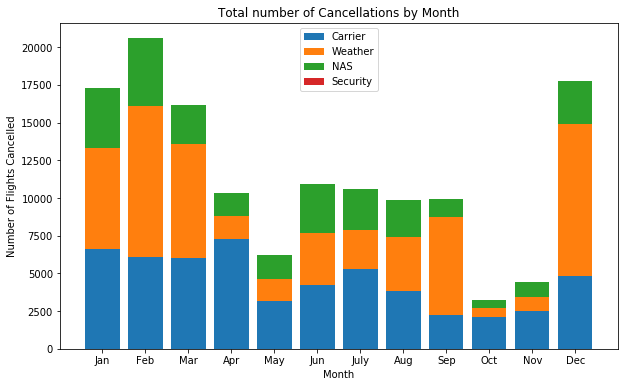

In [133]:
plt.figure(figsize = (10, 6))

# Plotting stacked barchart. Parameter "bottom" gives the location to start plotting
tot1 = plt.bar(months, carrier_tot)
tot2 = plt.bar(months, weather_tot, bottom = carrier_tot)
tot3 = plt.bar(months, nas_tot, bottom = carrier_tot + weather_tot)
tot4 = plt.bar(months, security_tot, bottom = carrier_tot + weather_tot + nas_tot)

plt.title("Total number of Cancellations by Month")
plt.ylabel("Number of Flights Cancelled")
plt.xlabel("Month")
plt.legend((tot1, tot2, tot3, tot4), ("Carrier", "Weather", "NAS", "Security"), loc = "upper center")
plt.xticks(months, months.map(months_dict));

In [134]:
# total number of flights cancelled due to security reasons by month
security_tot.astype(int), sum(cancellation_month)

(array([0, 2, 4, 0, 3, 0, 0, 0, 1, 0, 2, 0]), 137434)

As shown in this plot, there are very very few cancellations due to Security reasons and it is not visible from the plot. As shown above, only 12 flights are cancelled due to security reasons from a total of 137,343 cancelled flights.

Both weather and carrier are the main causes for cancellations. In February, September, and December, the large proportion of flights were cancelled due to weather. 

The following plot looks at the proportion of flights cancelled due to different reasons.

In [135]:
# denominator computes total number of cancellations by month
# result computes the proportion of cancellations
total_cancellation_month = f2008_clean.groupby(["Month"]).CancellationReason.count()
cancellation_prop = cancellation_month/total_cancellation_month
cancellation_prop.head()

Month  CancellationReason
1      weather               0.387740
       carrier               0.383349
       NAS                   0.228911
2      weather               0.487182
       carrier               0.295688
Name: CancellationReason, dtype: float64

In [136]:
# Unstack to simplify structure for plotting
cancellation_prop_df = pd.DataFrame(cancellation_prop).unstack("CancellationReason")
cancellation_prop_df.head()

CancellationReason                              
CancellationReason                NAS   carrier  security   weather
Month                                                              
1                            0.228911  0.383349       NaN  0.387740
2                            0.217032  0.295688  0.000097  0.487182
3                            0.161960  0.373108  0.000247  0.464685
4                            0.151038  0.706132       NaN  0.142830
5                            0.258147  0.506823  0.000482  0.234548

In [137]:
# Convert each cancellation reasons to numpy array for ease of plotting
carrier_prop = np.array(cancellation_prop_df.CancellationReason.carrier)
weather_prop = np.array(cancellation_prop_df.CancellationReason.weather)
nas_prop = np.array(cancellation_prop_df.CancellationReason.NAS)
security_prop = np.array(cancellation_prop_df.CancellationReason.security.fillna(0))
nas_prop

array([0.22891149, 0.21703243, 0.16196008, 0.15103815, 0.25814738,
       0.29567286, 0.25419891, 0.24412811, 0.11984263, 0.16989843,
       0.22633468, 0.16238259])

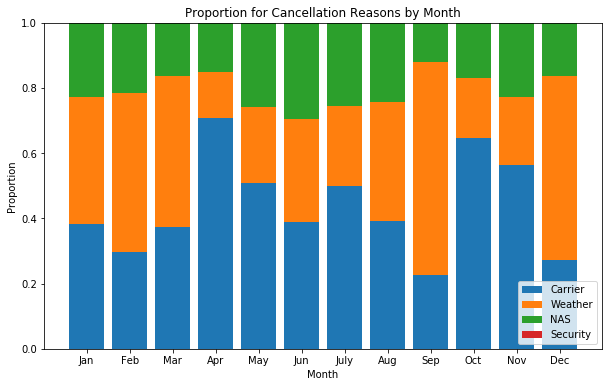

In [138]:
plt.figure(figsize = (10, 6))

# Plotting stacked barchart. Parameter "bottom" gives the location to start plotting
p1 = plt.bar(months, carrier_prop)
p2 = plt.bar(months, weather_prop, bottom = carrier_prop)
p3 = plt.bar(months, nas_prop, bottom = carrier_prop + weather_prop)
p4 = plt.bar(months, security_prop, bottom = carrier_prop + weather_prop + nas_prop)

plt.title("Proportion for Cancellation Reasons by Month")
plt.ylabel("Proportion")
plt.xlabel("Month")
plt.xticks(months, months.map(months_dict))
plt.legend((p1, p2, p3, p4), ("Carrier", "Weather", "NAS", "Security"), loc = 4);

This figure shows more pronounced the proportions between the different reasons for cancellations. 
Cancellations due to carrier is highest in April, May, June, July, August, October and November. Cancellations due to weather is highest in February, March, September, and December. In January, the proportions of carrier and weather cancellations are roughly equal. NAS cancellations take up around 10-30% of all cancellations for each given month. Security cancellations are very rare. 

#### `Origin_city` and `Dest_city` 

**Are there certain routes that are particularly popular for flights?**

In [139]:
routes = f2008_clean[["Origin_city", "Dest_city"]]
routes["Route"] = routes["Origin_city"] + " - "+ routes["Dest_city"]
routes.head()

/Users/ducvu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Origin_city,Dest_city,Route
0,Chantilly,Tampa,Chantilly - Tampa
1,Chantilly,Tampa,Chantilly - Tampa
2,Indianapolis,Baltimore,Indianapolis - Baltimore
3,Indianapolis,Baltimore,Indianapolis - Baltimore
4,Indianapolis,Baltimore,Indianapolis - Baltimore


In [140]:
# Top 30 routes in 2008
routes.Route.value_counts()[0:30]

New York - Boston              19548
Boston - New York              19401
New York - Chicago             14534
Chicago - New York             14454
Arlington - New York           14119
New York - Arlington           14004
San Francisco - Los Angeles    13788
Dallas - Houston               13520
Houston - Dallas               13496
Los Angeles - San Francisco    13390
New York - Atlanta             12786
Atlanta - New York             12421
Kahului - Honolulu             12383
Honolulu - Kahului             12014
Los Angeles - Las Vegas        11773
Las Vegas - Los Angeles        11729
Los Angeles - San Diego        11257
San Diego - Los Angeles        11224
Chicago - Minneapolis          11164
Atlanta - Chicago              10933
Honolulu - Lihue               10769
Detroit - Chicago              10732
Minneapolis - Chicago          10723
Chicago - Atlanta              10706
Chicago - Detroit              10672
Las Vegas - Phoenix            10626
Lihue - Honolulu               10407
D

Among the top 20 cities with the highest number of flight departures, what is the heatmap representing the number of flights between each cities? A heatmap is usually used for correlation. However, comparing the routes between 20 cities is a 20x20 = 400 data points, so a heatmap can be used to represent total volume of flights well.

In [141]:
# routes contains counts of each route
# top20_origin contains the top 20 cities with highest number of depature flights
routes = f2008_clean.groupby(["Origin_city", "Dest_city"]).size()
routes = routes.reset_index(name = "count")
top20_origin = f2008_clean.Origin_city.value_counts()[0:20]
top20_origin

Chicago              437999
Atlanta              414513
Dallas-Fort Worth    281281
Denver               241443
Houston              241105
New York             237939
Los Angeles          215608
Phoenix              199408
Las Vegas            172876
Detroit              161989
San Francisco        140587
Salt Lake City       139088
Newark               138506
Orlando              130872
Minneapolis          130289
Charlotte            126045
Boston               117915
Seattle              109069
Baltimore            104074
Philadelphia         100499
Name: Origin_city, dtype: int64

In [142]:
# Mask to give only the routes that contain departure and destination cities in the top 20
top20_cities = routes[routes.Origin_city.isin(top20_origin.index) & routes.Dest_city.isin(top20_origin.index)]
top20_cities.head()

,Origin_city,Dest_city,count
214,Atlanta,Baltimore,5978
220,Atlanta,Boston,5990
229,Atlanta,Charlotte,6720
233,Atlanta,Chicago,10933
242,Atlanta,Dallas-Fort Worth,9847


In [143]:
top20_cities = top20_cities.pivot(index = "Origin_city", columns = "Dest_city", values = "count")
top20_cities.head()

Dest_city,Atlanta,Baltimore,Boston,Charlotte,Chicago,Dallas-Fort Worth,Denver,Detroit,Houston,Las Vegas,Los Angeles,Minneapolis,New York,Newark,Orlando,Philadelphia,Phoenix,Salt Lake City,San Francisco,Seattle
Origin_city,,,,,,,,,,,,,,,,,,,,
Atlanta,NaN,5978.0,5990.0,6720.0,10933.0,9847.0,5726.0,5612.0,8861.0,4766.0,5406.0,5368.0,12421.0,8028.0,9613.0,6915.0,4603.0,2860.0,3462.0,2574.0
Baltimore,5972.0,NaN,4795.0,3652.0,6354.0,2311.0,2664.0,3105.0,2990.0,1626.0,898.0,974.0,1141.0,507.0,4926.0,692.0,2098.0,727.0,366.0,242.0
Boston,5982.0,4797.0,NaN,3533.0,7429.0,3036.0,2077.0,2306.0,1800.0,1383.0,2234.0,1635.0,19401.0,3883.0,3474.0,6375.0,1069.0,707.0,2668.0,979.0
Charlotte,6722.0,3684.0,3551.0,NaN,5652.0,3796.0,1925.0,2701.0,3711.0,1734.0,1458.0,1816.0,7205.0,5953.0,3277.0,3525.0,2186.0,212.0,1427.0,481.0
Chicago,10706.0,6328.0,7478.0,6026.0,NaN,8093.0,10098.0,10672.0,7515.0,9089.0,9364.0,11164.0,14454.0,7452.0,7366.0,9397.0,7924.0,3863.0,6607.0,6133.0


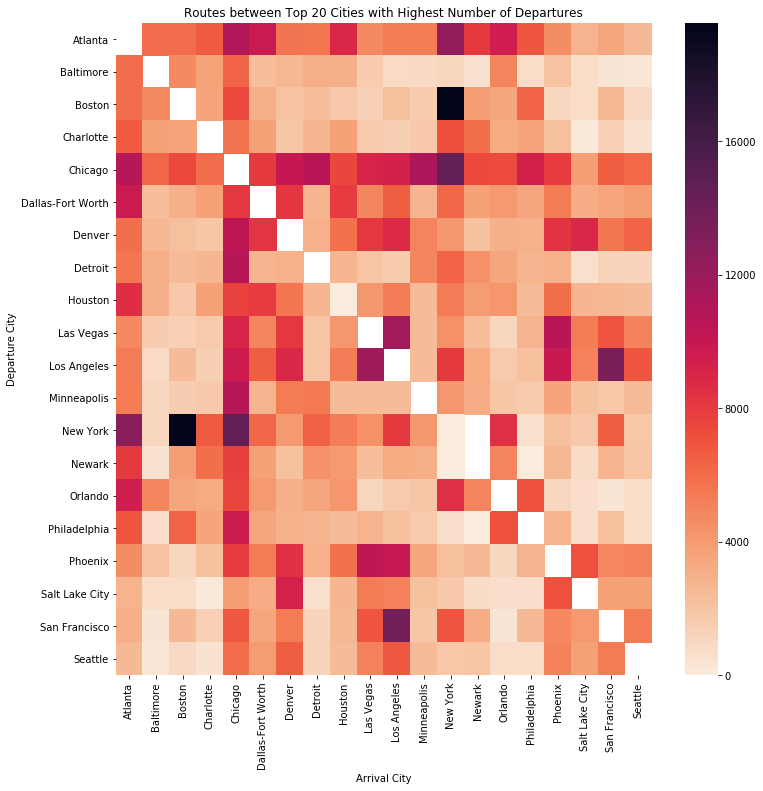

In [144]:
plt.figure(figsize = (12, 12))
sb.heatmap(top20_cities, cmap = sb.cm.rocket_r)
plt.title("Routes between Top 20 Cities with Highest Number of Departures")
plt.xlabel("Arrival City")
plt.ylabel("Departure City");

From the heatmap, flights connecting Boston and New York are most common. Other popular routes between New York and Atlanta, New York and Chicago, and Los Angeles and San Francisco. 

It can also be seen that there is a generally darker band running across and down the heatmap, corresponding to departure and arrival city: Chicago. This suggest that Chicago is one of the most busy airport in terms of the number of flight depatures and arrivals. 

Interestingly, there are non-zero flights between the two locations within the city of New York as well as Houston. This is indicated by a pale pink/orange colour instead of white. We will look closely at New York as an example.

In [145]:
top20_cities["New York"]

Origin_city
Atlanta              12421.0
Baltimore             1141.0
Boston               19401.0
Charlotte             7205.0
Chicago              14454.0
Dallas-Fort Worth     6198.0
Denver                4135.0
Detroit               6348.0
Houston               5312.0
Las Vegas             4481.0
Los Angeles           8058.0
Minneapolis           4164.0
New York                 2.0
Newark                   1.0
Orlando               8527.0
Philadelphia           679.0
Phoenix               2256.0
Salt Lake City        1808.0
San Francisco         6971.0
Seattle               1852.0
Name: New York, dtype: float64

In [146]:
# New York origins and destination
NewYork = f2008_clean[f2008_clean.Origin_city == "New York"]
NewYork[NewYork.Dest_city == "New York"]

,Year,Month,Day,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Distance,Cancelled,CancellationReason,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Airline,Origin_city,Origin_state,Dest_city,Dest_state,DateTime
2547298,2008,5,15,4,2037,1800,2125,1900,48.0,60.0,31.0,145.0,157.0,11,False,NaN,False,145.0,0.0,0.0,0.0,0.0,Comair Inc.,New York,NY,New York,NY,2008-05-15
4392215,2008,8,10,7,1315,1220,1415,1320,60.0,60.0,14.0,55.0,55.0,11,False,NaN,False,55.0,0.0,0.0,0.0,0.0,Comair Inc.,New York,NY,New York,NY,2008-08-10


In [147]:
# As the names of cities are dropped before, make a new DF to keep this information
f2008_mod = pd.merge(f2008, airports_mod, left_on = "Origin", right_on = "iata", how = "left")
f2008_mod = pd.merge(f2008_mod, airports_mod, left_on = "Dest", right_on = "iata", how = "left")
f2008_mod.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,...,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,iata_x,city_x,state_x,iata_y,city_y,state_y
0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,335,N712SW,128.0,150.0,116.0,...,0,NaN,0,NaN,NaN,NaN,NaN,NaN,IAD,Chantilly,VA,TPA,Tampa,FL
1,2008,1,3,4,754.0,735,1002.0,1000,WN,3231,N772SW,128.0,145.0,113.0,...,0,NaN,0,NaN,NaN,NaN,NaN,NaN,IAD,Chantilly,VA,TPA,Tampa,FL
2,2008,1,3,4,628.0,620,804.0,750,WN,448,N428WN,96.0,90.0,76.0,...,0,NaN,0,NaN,NaN,NaN,NaN,NaN,IND,Indianapolis,IN,BWI,Baltimore,MD
3,2008,1,3,4,926.0,930,1054.0,1100,WN,1746,N612SW,88.0,90.0,78.0,...,0,NaN,0,NaN,NaN,NaN,NaN,NaN,IND,Indianapolis,IN,BWI,Baltimore,MD
4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,3920,N464WN,90.0,90.0,77.0,...,0,NaN,0,2.0,0.0,0.0,0.0,32.0,IND,Indianapolis,IN,BWI,Baltimore,MD


In [148]:
# New York depature and arrival flights - full information
f2008_mod[(f2008_mod.city_x == "New York") & (f2008_mod.city_y == "New York")]

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,...,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,iata_x,city_x,state_x,iata_y,city_y,state_y
2547298,2008,5,15,4,2037.0,1800,2125.0,1900,OH,4988,N806CA,48.0,60.0,31.0,...,0,NaN,0,145.0,0.0,0.0,0.0,0.0,JFK,New York,NY,LGA,New York,NY
4392215,2008,8,10,7,1315.0,1220,1415.0,1320,OH,5572,N819CA,60.0,60.0,14.0,...,0,NaN,0,55.0,0.0,0.0,0.0,0.0,JFK,New York,NY,LGA,New York,NY


A closer analysis below reveals that two flights have both departure and arrival cities in New York. These flights depart from John F. Kennedy International Airport (IATA: JFK) and arrive at LaGuardia Airport (IATA: LGA), both from the city of New York.

#### `CarrierDelay` and `LateAircraftDelay` by `Airline` 

**Which airlines have the best and worst delay record (due to airline's own responsibility) on average?**

In [149]:
delay_airline = f2008_clean.groupby("Airline")[["CarrierDelay", "LateAircraftDelay"]].sum()
delay_airline["TotalDelay"] = delay_airline["CarrierDelay"] + delay_airline["LateAircraftDelay"]
delay_airline.sort_values(by=["TotalDelay"], ascending = True, inplace = True)
delay_airline.tail()

,CarrierDelay,LateAircraftDelay,TotalDelay
Airline,,,
Skywest Airlines Inc.,1678216.0,2355818.0,4034034.0
American Eagle Airlines Inc.,1705271.0,2604077.0,4309348.0
United Air Lines Inc.,1720150.0,3233343.0,4953493.0
American Airlines Inc.,2821907.0,3334548.0,6156455.0
Southwest Airlines Co.,2261002.0,6611132.0,8872134.0


It is a more valid comparison to compare the average time delayed per flight as Southwest Airlines Co. has the largest volumes of flights and Aloha Airlines Inc. has the lowest volume. 

In [150]:
# Find the total number of flights by airline and merge with DF from previous section
airline_total = f2008_clean.groupby("Airline").count().Year
delay_airline_total = pd.merge(delay_airline, airline_total, left_on = delay_airline.index,
                              right_on = airline_total.index)
delay_airline_total.tail()

,key_0,CarrierDelay,LateAircraftDelay,TotalDelay,Year
15,Skywest Airlines Inc.,1678216.0,2355818.0,4034034.0,567159
16,American Eagle Airlines Inc.,1705271.0,2604077.0,4309348.0,490693
17,United Air Lines Inc.,1720150.0,3233343.0,4953493.0,449515
18,American Airlines Inc.,2821907.0,3334548.0,6156455.0,604885
19,Southwest Airlines Co.,2261002.0,6611132.0,8872134.0,1201754


In [151]:
# Compute the average time delayed per flight
delay_airline_total["CarrierDelayAvg"] = delay_airline_total["CarrierDelay"]/delay_airline_total["Year"]
delay_airline_total["LateAircraftDelayAvg"] = delay_airline_total["LateAircraftDelay"]/delay_airline_total["Year"]
delay_airline_total.set_index("key_0", inplace = True)

In [152]:
# Order by total average time delayed
delay_airline_total["AvgTotalDelay"] = delay_airline_total["CarrierDelayAvg"] + delay_airline_total["LateAircraftDelayAvg"]
delay_airline_total.sort_values(by = ["AvgTotalDelay"], inplace = True)
delay_airline_total.tail()

,CarrierDelay,LateAircraftDelay,TotalDelay,Year,CarrierDelayAvg,LateAircraftDelayAvg,AvgTotalDelay
key_0,,,,,,,
American Eagle Airlines Inc.,1705271.0,2604077.0,4309348.0,490693,3.475230,5.306937,8.782167
JetBlue Airways,677621.0,1293235.0,1970856.0,196091,3.455646,6.595076,10.050721
American Airlines Inc.,2821907.0,3334548.0,6156455.0,604885,4.665196,5.512697,10.177893
Mesa Airlines Inc.,1927740.0,826011.0,2753751.0,254930,7.561841,3.240148,10.801989
United Air Lines Inc.,1720150.0,3233343.0,4953493.0,449515,3.826680,7.192959,11.019639


In [153]:
# Convert to numpy array
carrier_davg = np.array(delay_airline_total.CarrierDelayAvg)
late_davg = np.array(delay_airline_total.LateAircraftDelayAvg)

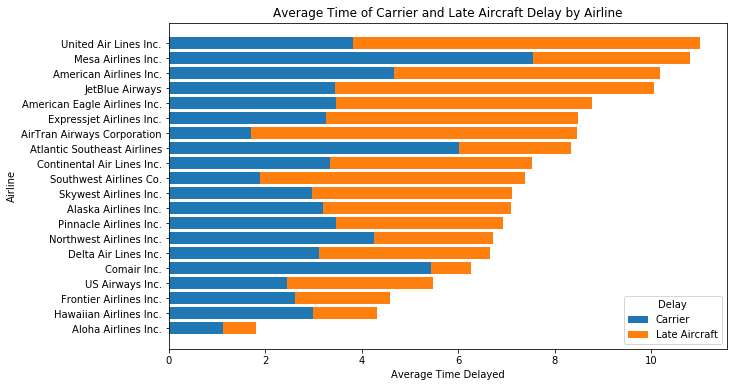

In [154]:
plt.figure(figsize = (10, 6))

carrier_plot_avg = plt.barh(delay_airline_total.index, carrier_davg)
late_plot_avg = plt.barh(delay_airline_total.index, late_davg, left = carrier_davg)

plt.title("Average Time of Carrier and Late Aircraft Delay by Airline")
plt.xlabel("Average Time Delayed")
plt.ylabel("Airline")

plt.legend((carrier_plot_avg, late_plot_avg), ("Carrier", "Late Aircraft"), title = "Delay");

From the above plot, four airlines have an average of over 10 minutes delayed (in descending order of total average time): United Air Lines Inc., Mesa Airlines Inc., American Airlines Inc, and JetBlue Airways. Southwest Arilines Co. which previously shown the highest total time delayed does not have such a high average time delayed. Aloha Airlines Inc. has the best record of lowest average time of delays (under 2 minutes) due to carrier and late aircraft arrival. 

This insight provides details about which airline has the highest and lowest efficiency when it comes to aircraft maintenance and schedule. Perhaps, this will allow customers to identify which airlines are more punctual, increasing the tickets bought at those airlines. The bad-performing airlines may use this to improve their delay records.

#### `ArrDelay`, `DepDelay`, and `Year` 

**How has the average departure and arrival delay change over the past 20 years (five year intervals between 1988-2008)?**

In [155]:
delay_1988 = [f1988.DepDelay.mean(), f1988.ArrDelay.mean()]
delay_1993 = [f1993.DepDelay.mean(), f1993.ArrDelay.mean()]
delay_1998 = [f1998.DepDelay.mean(), f1998.ArrDelay.mean()]
delay_2003 = [f2003.DepDelay.mean(), f2003.ArrDelay.mean()]
delay_2008 = [f2008.DepDelay.mean(), f2008.ArrDelay.mean()]

In [156]:
delays_df = pd.DataFrame([delay_1988, delay_1993, delay_1998, delay_2003, delay_2008],
                        columns = ["DepDelayAvg", "ArrDelayAvg"], index = [1988, 1993, 1998, 2003, 2008]) 
delays_df

,DepDelayAvg,ArrDelayAvg
1988,6.706768,6.547350
1993,6.122581,5.344062
1998,9.024561,7.586968
2003,5.248231,3.596694
2008,9.972570,8.168452


For the following plot, the average for both departure and arrival delays are plotted, without taking into account the outliers.

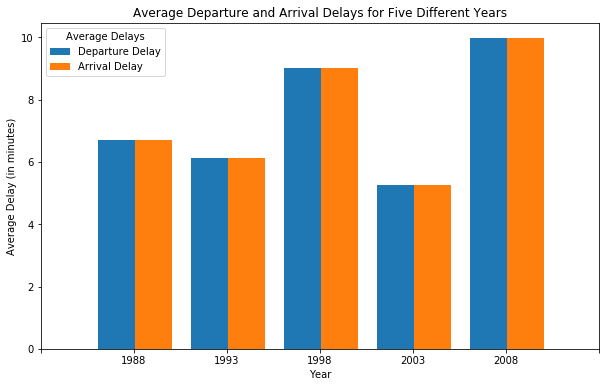

In [157]:
plt.figure(figsize = (10, 6))
plt.bar(x = delays_df.index, height = delays_df.DepDelayAvg, width = 2, color = base_color, 
        label = "Departure Delay")
plt.bar(x = delays_df.index + 2, height = delays_df.DepDelayAvg, width = 2, color = sb.color_palette()[1], 
       label = "Arrival Delay")
plt.title("Average Departure and Arrival Delays for Five Different Years")
plt.xlabel("Year")
plt.ylabel("Average Delay (in minutes)")
plt.legend(title = "Average Delays")

ax = plt.gca().get_xticks()
plt.xticks(ax - 1.05, ["", 1988, 1993, 1998, 2003, 2008]);

The average departure and arrival delays are very similar for every year investigated. 2008 has the highest average time delayed, while 2003 has the lowest average time delayed. 

If extreme outliers are removed, and say the delays of interest are anywhere between -20 minutes and 120 minutes, the following plot will be created. This removes extreme values, for example in 2008, there were flights up to 40 hours delayed.

In [158]:
delay_1988_outliers = (f1988[(f1988.DepDelay >= -20) & (f1988.DepDelay <= 120)].DepDelay.mean(), 
                       f1988[(f1988.ArrDelay >= -20) & (f1988.ArrDelay <= 120)].ArrDelay.mean())
delay_1993_outliers = (f1993[(f1993.DepDelay >= -20) & (f1993.DepDelay <= 120)].DepDelay.mean(), 
                       f1993[(f1993.ArrDelay >= -20) & (f1993.ArrDelay <= 120)].ArrDelay.mean())
delay_1998_outliers = (f1998[(f1998.DepDelay >= -20) & (f1998.DepDelay <= 120)].DepDelay.mean(), 
                       f1998[(f1998.ArrDelay >= -20) & (f1998.ArrDelay <= 120)].ArrDelay.mean())
delay_2003_outliers = (f2003[(f2003.DepDelay >= -20) & (f2003.DepDelay <= 120)].DepDelay.mean(), 
                       f2003[(f2003.ArrDelay >= -20) & (f2003.ArrDelay <= 120)].ArrDelay.mean())
delay_2008_outliers = (f2008[(f2008.DepDelay >= -20) & (f2008.DepDelay <= 120)].DepDelay.mean(), 
                       f2008[(f2008.ArrDelay >= -20) & (f2008.ArrDelay <= 120)].ArrDelay.mean())

In [159]:
delays_df_outliers = pd.DataFrame([delay_1988_outliers, delay_1993_outliers, delay_1998_outliers, 
                                   delay_2003_outliers, delay_2008_outliers], 
                                  columns = ["DepDelayAvg", "ArrDelayAvg"], index = [1988, 1993, 1998, 2003, 2008]) 
delays_df_outliers

,DepDelayAvg,ArrDelayAvg
1988,5.657600,5.901268
1993,5.159929,4.702635
1998,6.694841,6.099257
2003,3.546093,3.054556
2008,6.294562,5.864995


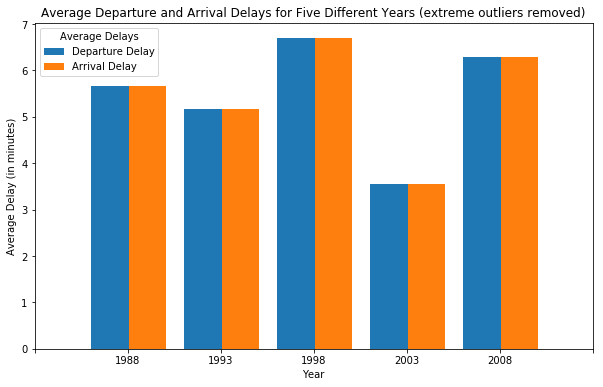

In [160]:
plt.figure(figsize = (10, 6))
plt.bar(x = delays_df_outliers.index, height = delays_df_outliers.DepDelayAvg, width = 2, color = base_color, 
        label = "Departure Delay")
plt.bar(x = delays_df_outliers.index + 2, height = delays_df_outliers.DepDelayAvg, width = 2, color = sb.color_palette()[1], 
       label = "Arrival Delay")
plt.title("Average Departure and Arrival Delays for Five Different Years (extreme outliers removed)")
plt.xlabel("Year")
plt.ylabel("Average Delay (in minutes)")
plt.legend(title = "Average Delays")

ax = plt.gca().get_xticks()
plt.xticks(ax - 1.05, ["", 1988, 1993, 1998, 2003, 2008]);

By removing outliers, 1998 becomes the year with the highest average delays, followed by 2008. 2003 as from previous plot has the lowest average delays.

#### Number of flights throughout the `Year`

**How has the number of flight departures change with a 7-day moving average over the past 20 years (five year intervals between 1988-2008)?**

First change the name of column `DayofMonth` to `Day` for the DF from 1988-2003.

In [161]:
name_change = {"DayofMonth": "Day"}
f1988_clean.rename(columns = name_change, inplace = True)
f1993_clean.rename(columns = name_change, inplace = True)
f1998_clean.rename(columns = name_change, inplace = True)
f2003_clean.rename(columns = name_change, inplace = True)
f2003_clean.head()

,Year,Month,Day,ArrDelay,DepDelay,Cancelled
0,2003,1,29,-1.0,-4.0,False
1,2003,1,30,-3.0,-1.0,False
2,2003,1,31,23.0,29.0,False
3,2003,1,1,-9.0,-2.0,False
4,2003,1,2,52.0,18.0,False


Then create new column as datetime object. Subsequently, the total number of flights can be grouped by day.

In [162]:
f1988_clean["DateTime"] = pd.to_datetime(f1988_clean[["Year", "Month", "Day"]])
f1993_clean["DateTime"] = pd.to_datetime(f1993_clean[["Year", "Month", "Day"]])
f1998_clean["DateTime"] = pd.to_datetime(f1998_clean[["Year", "Month", "Day"]])
f2003_clean["DateTime"] = pd.to_datetime(f2003_clean[["Year", "Month", "Day"]])
f2003_clean.head()

,Year,Month,Day,ArrDelay,DepDelay,Cancelled,DateTime
0,2003,1,29,-1.0,-4.0,False,2003-01-29
1,2003,1,30,-3.0,-1.0,False,2003-01-30
2,2003,1,31,23.0,29.0,False,2003-01-31
3,2003,1,1,-9.0,-2.0,False,2003-01-01
4,2003,1,2,52.0,18.0,False,2003-01-02


In [163]:
flight_1988 = f1988_clean.groupby("DateTime").count()
flight_1993 = f1993_clean.groupby("DateTime").count()
flight_1998 = f1998_clean.groupby("DateTime").count()
flight_2003 = f2003_clean.groupby("DateTime").count()
flight_2008 = f2008_clean.groupby("DateTime").count()
flight_2003.head()

,Year,Month,Day,ArrDelay,DepDelay,Cancelled
DateTime,,,,,,
2003-01-01,16144,16144,16144,15998,16012,16144
2003-01-02,18528,18528,18528,18249,18279,18528
2003-01-03,18870,18870,18870,18471,18488,18870
2003-01-04,16131,16131,16131,15903,15919,16131
2003-01-05,17642,17642,17642,17371,17404,17642


To plot different days of the year for different years, additional tidiness issues has been addressed as follows.

In [164]:
# 1988 and 2008 were leap years. For simplicity of plots, the leap days will be removed
flight_1988 = flight_1988[flight_1988.index != "1988-02-29"]
flight_2008 = flight_2008[flight_2008.index != "2008-02-29"]
len(flight_1988), len(flight_2008)

(365, 365)

In [165]:
# Calculating 7-day moving average
ma_1988 = flight_1988.Year.rolling(window = 7).mean()
ma_1993 = flight_1993.Year.rolling(window = 7).mean()
ma_1998 = flight_1998.Year.rolling(window = 7).mean()
ma_2003 = flight_2003.Year.rolling(window = 7).mean()
ma_2008 = flight_2008.Year.rolling(window = 7).mean()

In [166]:
# Convert to numpy array to allow for plotting of time series of different years on same chart
ma_1988_array = np.array(ma_1988.values)
ma_1993_array = np.array(ma_1993.values)
ma_1998_array = np.array(ma_1998.values)
ma_2003_array = np.array(ma_2003.values)
ma_2008_array = np.array(ma_2008.values)

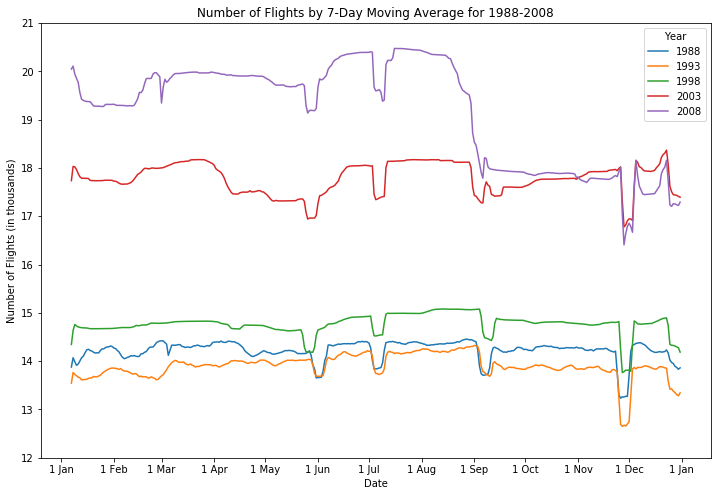

In [167]:
plt.figure(figsize = (12, 8))

x = [i for i in range(1, 366)]

plt.errorbar(x, y = ma_1988_array, label = "1988")
plt.errorbar(x, y = ma_1993_array, label = "1993")
plt.errorbar(x, y = ma_1998_array, label = "1998")
plt.errorbar(x, y = ma_2003_array, label = "2003")
plt.errorbar(x, y = ma_2008_array, label = "2008")

plt.title("Number of Flights by 7-Day Moving Average for 1988-2008")
plt.xlabel("Date")
plt.ylabel("Number of Flights (in thousands)")
ticks30 = np.array([n for n in range (12, 22)])
plt.yticks(ticks30 * 1000, ticks30)
plt.legend(title = "Year");

plt.xticks([1, 32, 60, 91, 121, 152, 182, 213, 244, 274, 305, 335, 366], 
           ["1 Jan", "1 Feb", "1 Mar", "1 Apr", "1 May", "1 Jun", 
            "1 Jul", "1 Aug", "1 Sep", "1 Oct", "1 Nov", "1 Dec", "1 Jan"]);

As shown above, year 1993 has on average the lowest number of flights, followed by 1988 and then 1998. 2003 has the second highest number of flights and 2008 has the highest the number of flights scheduled. 

By looking at the all five plots, there are several patterns that are visible. There is a small dip in flights at the end of May to the beginning of June, and at the beginning of July and September. There tends to be a signficant dip at the end of November and beginning of December for all years. In 2008, the number of flights experience a huge fall from around mid-August compared with other years, which is uncharacteristic.

Year 1993 has on average the lowest number of flights, followed by 1988 and then 1998. 2003 has the second highest number of flights and 2008 has the highest the number of flights scheduled. From 1998-2008, the number of flights have increased. Perhaps this could be due to flying becoming a more and more popular mode of transportation for travelling, especially with the advancements in technology in aircrafts, and cheaper air tickets.

There are several patterns visible. There is a small dip in flights at the end of May to the beginning of June, and at the beginning of July and September. There tends to be a signficant dip at the end of November and beginning of December for all years. 

In 2008, the number of flights experience a huge fall from around mid-August compared with other years, which is uncharacteristic. This coincides with the financial crisis which started in September. Could this be the reason for the unexpected large fall in flights scheuduled?

<a id="multicon"></a>
### Analysis and Insights of Multivariate Exploration

The following interesting insights have been found:

- **`Month`, `Cancelled`, and `CancellationReason`**
    - Both weather and carrier are the main causes for cancellations. In February, September, and December, the large proportion of flights were cancelled due to weather. 
    - By comparing the proportions of cancellations, cancellations due to carrier is highest in April, May, June, July, August, October and November. Cancellations due to weather is highest in February, March, September, and December. In January, the proportions of carrier and weather cancellations are roughly equal. NAS cancellations take up around 10-30% of all cancellations for each given month. Security cancellations are very rare (12 flights cancelled  from a total of 137,343 cancelled flights).
    - This insight demonstrates that a large proportion of cancellations are due to factors outside the human control, namely weather. However, an even larger proportion of flight cancellations are due to human errors, namely carrier and NAS which are attributed to the airlines and the airports. This is one aspect that can be improved to lower the proportion and total number of flights cancelled that humans can control.
- **`Origin_city` and `Dest_city`**
    - The heatmap shows the number of flights between the top 20 cities with highest number of departed flights. Flights connecting Boston and New York are most common. Other popular routes include New York and Atlanta, New York and Chicago, and Los Angeles and San Francisco. 
    - There is a generally darker band running across and down the heatmap, corresponding to departure and arrival city: Chicago. This suggest that Chicago is one of the most busy airport in terms of the number of flight departures and arrivals. 
    - Interestingly, there are non-zero flights between the two locations within the city of New York as well as Houston. Taking New York as an example, further analysis indicate that these flights depart from John F. Kennedy International Airport (IATA: JFK) and arrive at LaGuardia Airport (IATA: LGA), both from the city of New York.
- **`CarrierDelay` and `LateAircraftDelay` by `Airline`**
    - Four airlines have an average of over 10 minutes delayed (in descending order of total average time): United Air Lines Inc., Mesa Airlines Inc., American Airlines Inc, and JetBlue Airways. Southwest Airlines Co. which previously shown the highest total time delayed does not have such a high average time delayed. Aloha Airlines Inc. has the best record of lowest average time of delays (under 2 minutes) due to carrier and late aircraft arrival. 
    - This insight provides details about which airline has the highest and lowest efficiency when it comes to aircraft maintenance and schedule. Perhaps, this will allow customers to identify which airlines are more punctual, increasing the tickets bought at those airlines. The bad-performing airlines may use this to improve their delay records.
- **`ArrDelay`, `DepDelay`, and `Year`**
    - 1998 becomes the year with the highest average delays, followed by 2008. Then 1988, 1993, and 2003 has a lower average delays, with the latter being the lowest.
- **Number of flights throughout the `Year`**
    - Year 1993 has on average the lowest number of flights, followed by 1988 and then 1998. 2003 has the second highest number of flights and 2008 has the highest the number of flights scheduled. From 1998-2008, the number of flights have increased. Perhaps this could be due to flying becoming a more and more popular mode of transportation for travelling, especially with the advancements in technology in aircrafts, and cheaper air tickets.
    - There are several patterns visible. There is a small dip in flights at the end of May to the beginning of June, and at the beginning of July and September. There tends to be a signficant dip at the end of November and beginning of December for all years. 
    - In 2008, the number of flights experience a huge fall from around mid-August compared with other years, which is uncharacteristic. This coincides with the financial crisis which started in September. Could this be the reason for the unexpected large fall in flights scheuduled?

Jump to <a href="#multi">Multivariate Visualisations</a>

Jump to <a href="#TOC">Top of the Page</a>